<h1><center> Research Methods for Quantitative Professionals - Group 3 </center></h1>

<h2><center> Does changing rebalancing frequency within and across regimes improve portfolio returns? </center></h2>

## Libraries:

In [89]:
#### Library inmport guidelines:

'''
There are numerous libraries required to be installed for the widgets and the dashboard; pip installation instructions:
https://packaging.python.org/tutorials/installing-packages/
   
Use the following to enable dashboard view:    
https://jupyter-dashboards-layout.readthedocs.io/en/latest/

There is one more library required which isn’t there in the official python repository yet, for which u need to clone a git repository: https://pyplot-hierarchical-pie.readthedocs.io/en/latest/
To clone, you need to get git bash, it is https://git-scm.com/downloads

'''

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math
from openpyxl import load_workbook 
import seaborn as sns
import warnings 
from IPython.display import Image
from statistics import mean 
from dfply import *
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)}) ## Set the default size for figures.
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image , display, Javascript
# from IPython.html.widgets import interact, SelectWidget, CheckboxWidget, RadioButtonsWidget, SelectMultiple
from __future__ import print_function
from ipywidgets.widgets import (interact, interactive, interactive_output, fixed, ToggleButtons,
interact_manual, SelectMultiple, Output, RadioButtons,IntSlider, Dropdown, Layout, Select, HBox, VBox, Checkbox, Button)
#import ipywidgets as widgets
import asyncio
import re
from plotly import plotly
import itertools
from decimal import Decimal
from colour import Color
import mpld3
from hpie import HPie, stringvalues_to_pv
from scipy.optimize import minimize
np.random.seed(1234)  ## Set the seed

## Setting the size of the output window:

In [3]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:20000px;  /* your desired max-height here */
    max-width: 5000px;
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

## Function to store values from the widgets:

In [4]:
%gui asyncio

def wait_for_change(widget, value):
    future = asyncio.Future()
    def getvalue(change):
        # make the new value available
        future.set_result(change.new)
        widget.unobserve(getvalue, value)
    widget.observe(getvalue, value)
    temp = future
    return future

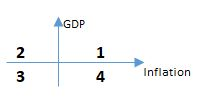

In [5]:
Image(filename='quad.jpg')

## Define a custom color map function:

In [6]:
def my_color_map(val):
    if type(val) == str:
        val = re.sub(r'%', ' ', val) # Remove '%', if any
        color = 'red' if int(val) <= 0 else 'green'
    else:
        color = 'red' if val <= 0 else 'green'
    return 'color: %s' % color

# display(avg_table.style.background_gradient( cmap = "coolwarm_r" , axis = 0 ))

## Define a custom percentage (%) formatter function:

In [7]:
def my_percent_formatter(my_df , val):
    my_df[val] = my_df[val] / 100
    my_df[val] = my_df[val].mul(100).astype(int).astype(str).add('%')

# Collecting Data from excel and trimming it based on the requirement

In [8]:
# file_name_list = ['Data_23rdApril.xlsx', 'Data_23rdApril_semi.xlsx','Data_23rdApril_annual.xlsx']

#file_name_list = ['Data_234_fcst.xlsx', 'Data_234_semi_fcst.xlsx','Data_234_annual_fcst.xlsx']

file_name_list_f = ['Data_23rdApril.xlsx', 'Data_23rdApril_semi.xlsx','Data_23rdApril_annual.xlsx',
                    'Data_304_fcst.xlsx', 'Data_304_semi_fcst.xlsx','Data_304_annual_fcst.xlsx']

last_date_list_f = [ '01OCT2015', '01JUL2015', '01OCT2015', '01OCT2015', '01JUL2015', '01OCT2015']




file_name = file_name_list_f[0]



df_USD = pd.read_excel(file_name, header = None,sheet_name = 'USD')
df_gold = pd.read_excel(file_name, header = None,sheet_name = 'gold')
df_equity = pd.read_excel(file_name, header = None,sheet_name = 'equity')
df_bonds = pd.read_excel(file_name, header = None,sheet_name = 'bonds')
df_commodities = pd.read_excel(file_name, header = None,sheet_name = 'commodities')
df_GDP = pd.read_excel(file_name, header = None,sheet_name = 'GDP')
df_CPI = pd.read_excel(file_name, header = None,sheet_name = 'CPI')

df_USD.columns = ['Date','price']
df_gold.columns = ['Date','price']
df_equity.columns = ['Date','price']
df_bonds.columns = ['Date','price']
df_commodities.columns = ['Date','price']
df_GDP.columns = ['Date','return']
df_CPI.columns = ['Date','return']


####   input below --- till what date you want to trim the data?

Last_date_input = "01OCT2015"

date = datetime.datetime.strptime(Last_date_input, "%d%b%Y")

Last_date = date

index_for_Last_date_testing =0


for i in range(len(df_USD)):
    
    
    if df_USD['Date'][i] ==  Last_date:
        
        index_for_Last_date_testing  = i
        
        break
    
    else:
        continue

        
############## Below dataframes are new dateframes created from orginal dataframes which include entrire data
############## Dataframes are trimmed according to the 'Date' inputed above 

df_USD = df_USD.loc[:index_for_Last_date_testing,:]
df_gold = df_gold.loc[:index_for_Last_date_testing,:]
df_equity = df_equity.loc[:index_for_Last_date_testing,:]
df_bonds = df_bonds.loc[:index_for_Last_date_testing,:]
df_commodities = df_commodities.loc[:index_for_Last_date_testing,:]
df_GDP = df_GDP.loc[:index_for_Last_date_testing,:]
df_CPI = df_CPI.loc[:index_for_Last_date_testing,:]

# index_for_Last_date_testing

In [9]:
#### below list contains change in GDP values quarter on quarter 

delta_change_GDP = [df_GDP['return'][i+1] - df_GDP['return'][i] for i in range(len(df_GDP)-1)]


#### below list contains change in CPI values quarter on quarter 

delta_change_CPI = [df_CPI['return'][i+1] - df_CPI['return'][i] for i in range(len(df_GDP)-1)]


# Creating a DataFrame - 'data_point' to study the data points collected above 

# Data points here are all the ( delta inflation, delta GDP) points in between 1993 Q1 and 2015 Q4

In [11]:
data_point = pd.DataFrame()
data_point['Date'] = df_GDP['Date'][1:]
data_point['delta_change_CPI'] = delta_change_CPI
data_point['delta_change_GDP'] = delta_change_GDP
data_point['quadrant_number'] = np.zeros(len(delta_change_CPI))


In [12]:
#### for example: 'index_quadrant1' will give us a list of index of all the data points that fall into 1st quadrant  ( index is coming from 'data_point' DataFrame)
#### for example: 'Date_quadrant2' will give us a list of dates of all the data points that fall into 1st quadrant 

Date_quadrant1 = []
index_quadrant1 = []

Date_quadrant2 = []
index_quadrant2 = []

Date_quadrant3 = []
index_quadrant3 = []

Date_quadrant4 = []
index_quadrant4 = []


In [13]:

for i in range(len(delta_change_CPI)):
    
    if data_point.iloc[i,1]>=0 and data_point.iloc[i,2]>=0:
        
        Date_quadrant1.append(data_point['Date'][i+1])
        index_quadrant1.append(i+1)
        
        
    elif data_point.iloc[i,1]<0 and data_point.iloc[i,2]>=0:
        Date_quadrant2.append(data_point['Date'][i+1])    
        index_quadrant2.append(i+1)
        
        
    elif data_point.iloc[i,1]<0 and data_point.iloc[i,2]<0:
        Date_quadrant3.append(data_point['Date'][i+1])    
        index_quadrant3.append(i+1)
        
        
    else:
        Date_quadrant4.append(data_point['Date'][i+1])
        index_quadrant4.append(i+1)
        
        
        

In [14]:
for i in index_quadrant1:
    data_point.loc[i,'quadrant_number'] = int(1)

for i in index_quadrant2:
    data_point.loc[i,'quadrant_number'] = int(2)
    
for i in index_quadrant3:
    data_point.loc[i,'quadrant_number'] = int(3)
    
for i in index_quadrant4:
    data_point.loc[i,'quadrant_number'] = int(4)

In [15]:
data_point['previous_quadrant'] = np.zeros(len(data_point))
data_point['next_quadrant'] = np.zeros(len(data_point))

In [16]:
warnings.filterwarnings('ignore') 
data_point['previous_quadrant'][1] = 'data_not_available'
data_point['next_quadrant'][len(data_point)] = 'data_not_available'


In [17]:
warnings.filterwarnings('ignore') 
for i in data_point.index[1:]:
        data_point['previous_quadrant'][i] = data_point['quadrant_number'][i-1]

for i in data_point.index[:-1]:
        data_point['next_quadrant'][i] = data_point['quadrant_number'][i+1]  
                

In [18]:
data_point['USD returns'] = df_USD['price'].pct_change()[1:]*100
data_point['gold returns'] = df_gold['price'].pct_change()[1:]*100
data_point['equity returns'] = df_equity['price'].pct_change()[1:]*100
data_point['bonds returns'] = df_bonds['price'].pct_change()[1:]*100
data_point['commodities returns'] = df_commodities['price'].pct_change()[1:]*100
#data_point


In [19]:
data_point['Year'] = data_point.Date.str.slice(0, 4) ## Extract the year
# data_point


## Create required dictionaries:

In [20]:
## Create dictionary with Assets available: 
asset_dic = ['USD' , 'gold' , 'equity' , 'bonds' , 'commodities']
asset_list = {key: value for (key, value) in zip(asset_dic, asset_dic)}

## Create a Dictionary of all the available timeperiods:
timeframe_dic = list(data_point.Year.unique())
timeframe_list = {key: value for (key, value) in zip(timeframe_dic, timeframe_dic)}



## Intuitive Correlation Matrix Plot Function:


In [21]:
## Intuitive Correlation Matrix Plot Funtion:

def my_heatmap( x , y , size , color , field_len , num_show ):
    
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = ( 350 / field_len ) ** 2
    
    n_colors = 256 # Use 256 colors for the diverging color palette
    palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
    color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
        ind = int(val_position * (n_colors - 1)) # target index in the color palette
        return palette[ind]
    
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot
    
    ax.scatter(
        x = x.map(x_to_num), # Use mapping for x
        y = y.map(y_to_num), # Use mapping for y
        s = size.abs() * size_scale, # Vector of square sizes, proportional to size parameter
        c = color.apply(value_to_color), # Vector of square colors, mapped to color palette
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    ax.grid(False, 'major') # Turn off major gridlines
    ax.grid(True, 'minor') # Turn on minor gridlines
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True) # Set gridlines to appear between integer coordinates
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True) # Do the same for y axis
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    
    ## Displaying the numerical values:
    
    if num_show == 'Yes':
        
            size_disp = [round(i,2) for i in size]

            for i, txt in enumerate(size_disp):
                ax.annotate(txt , (x.map(x_to_num)[i] , y.map(y_to_num)[i]) , fontsize = 150 / field_len)

       
    # Add color legend on the right side of the plot
    ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

    col_x = [0]*len(palette) # Fixed x coordinate for the bars
    y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

    bar_height = y[1] - y[0]
    ax.barh(
        y=y,
        width=[5]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(y), max(y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right() # Show vertical ticks on the right 


In [22]:
data_point_for_correlation_matrix = data_point.drop(['Date','delta_change_CPI','delta_change_GDP','quadrant_number','previous_quadrant','next_quadrant','Year'],axis=1)
#data_point_for_correlation_matrix

## Create a Correlation Matrix based on the 'Returns' Columns for the selected assets:


# Creating a data frame - ' returns_data' 

# returns_data will help you look into the average returns of all the asset classes when they are falling into a particular regime

In [23]:
###### below are the returns of all the data points that fall into a particular quadrant --- 

##### for example --- gold_returns_1 will give all gold returns of all the data points that fall into 1st quadrant

gold_returns_1 = []
bond_returns_1 =[]
equity_returns_1 =[]
USD_returns_1 =[]
commodities_returns_1 =[]

gold_returns_2 = []
bond_returns_2 =[]
equity_returns_2 =[]
USD_returns_2 =[]
commodities_returns_2 =[]

gold_returns_3 = []
bond_returns_3 =[]
equity_returns_3 =[]
USD_returns_3 =[]
commodities_returns_3 =[]
    
gold_returns_4 = []
bond_returns_4 =[]
equity_returns_4 =[]
USD_returns_4 =[]
commodities_returns_4 =[]


for i in index_quadrant1:
    gold_returns_1.append(data_point['gold returns'][i])
    bond_returns_1.append(data_point['bonds returns'][i])
    equity_returns_1.append(data_point['equity returns'][i])
    USD_returns_1.append(data_point['USD returns'][i])
    commodities_returns_1.append(data_point['commodities returns'][i])

    
for i in index_quadrant2:
    gold_returns_2.append(data_point['gold returns'][i])
    bond_returns_2.append(data_point['bonds returns'][i])
    equity_returns_2.append(data_point['equity returns'][i])
    USD_returns_2.append(data_point['USD returns'][i])
    commodities_returns_2.append(data_point['commodities returns'][i])

for i in index_quadrant3:
    gold_returns_3.append(data_point['gold returns'][i])
    bond_returns_3.append(data_point['bonds returns'][i])
    equity_returns_3.append(data_point['equity returns'][i])
    USD_returns_3.append(data_point['USD returns'][i])
    commodities_returns_3.append(data_point['commodities returns'][i])

    
for i in index_quadrant4:
    gold_returns_4.append(data_point['gold returns'][i])
    bond_returns_4.append(data_point['bonds returns'][i])
    equity_returns_4.append(data_point['equity returns'][i])
    USD_returns_4.append(data_point['USD returns'][i])
    commodities_returns_4.append(data_point['commodities returns'][i])

    
####### for example: avg_gold_1 will give us the average of all gold returns that fall into 1st quadrant   

avg_gold_1 = mean(np.array(gold_returns_1))
avg_bond_1 = mean(np.array(bond_returns_1))
avg_equity_1 = mean(np.array(equity_returns_1))   
avg_USD_1 = mean(np.array(USD_returns_1))   
avg_commodities_1 = mean(np.array(commodities_returns_1))  

avg_gold_2 = mean(np.array(gold_returns_2))   
avg_bond_2 = mean(np.array(bond_returns_2))   
avg_equity_2 = mean(np.array(equity_returns_2))   
avg_USD_2 = mean(np.array(USD_returns_1))   
avg_commodities_2 = mean(np.array(commodities_returns_2))

avg_gold_3 = mean(np.array(gold_returns_3))  
avg_bond_3 = mean(np.array(bond_returns_3))   
avg_equity_3 = mean(np.array(equity_returns_3))   
avg_USD_3 = mean(np.array(USD_returns_3))   
avg_commodities_3 = mean(np.array(commodities_returns_3))  

avg_gold_4 = mean(np.array(gold_returns_4))   
avg_bond_4 = mean(np.array(bond_returns_4))  
avg_equity_4 = mean(np.array(equity_returns_4))   
avg_USD_4 = mean(np.array(USD_returns_4))
avg_commodities_4 = mean(np.array(commodities_returns_4))


In [24]:

return_data = pd.DataFrame(index=['Quadrant 1','Quadrant 2','Quadrant 3', 'Quadrant 4'])


return_data['average_gold_retuns'] = [ avg_gold_1,avg_gold_2,avg_gold_3,avg_gold_4]
return_data['max gold return'] = [max(gold_returns_1),max(gold_returns_2),max(gold_returns_3),max(gold_returns_4)]
return_data['min gold return'] = [min(gold_returns_1),min(gold_returns_2),min(gold_returns_3),min(gold_returns_4)]
return_data['average_bond_retuns'] = [ avg_bond_1,avg_bond_2,avg_bond_3,avg_bond_4]
return_data['max bond return'] = [max(bond_returns_1),max(bond_returns_2),max(bond_returns_3),max(bond_returns_4)]
return_data['min bond return'] = [min(bond_returns_1),min(bond_returns_2),min(bond_returns_3),min(bond_returns_4)]
return_data['average_equity_retuns'] = [ avg_equity_1,avg_equity_2,avg_equity_3,avg_equity_4]
return_data['max equity return'] = [max(equity_returns_1),max(equity_returns_2),max(equity_returns_3),max(equity_returns_4)]
return_data['min equity return'] = [min(equity_returns_1),min(equity_returns_2),min(equity_returns_3),min(equity_returns_4)]
return_data['average_USD_retuns'] = [ avg_USD_1,avg_USD_2,avg_USD_3,avg_USD_4]
return_data['max USD return'] = [max(USD_returns_1),max(USD_returns_2),max(USD_returns_3),max(USD_returns_4)]
return_data['min USD return'] = [min(USD_returns_1),min(USD_returns_2),min(USD_returns_3),min(USD_returns_4)]
return_data['average_commodities_retuns'] = [ avg_commodities_1,avg_commodities_2,avg_commodities_3,avg_commodities_4]
return_data['max commodities return'] = [max(commodities_returns_1),max(commodities_returns_2),max(commodities_returns_3),max(commodities_returns_4)]
return_data['min commodities return'] = [min(commodities_returns_1),min(commodities_returns_2),min(commodities_returns_3),min(commodities_returns_4)]


# return_data

In [25]:
date_quad_1 =[]
date_quad_2 =[]
date_quad_3 =[]
date_quad_4 =[]

for i in index_quadrant1:
    
    date_quad_1.append(data_point['Date'][i])

for i in index_quadrant2:
    
    date_quad_2.append(data_point['Date'][i])

for i in index_quadrant3:
    
    date_quad_3.append(data_point['Date'][i])
    
for i in index_quadrant4:
    
    date_quad_4.append(data_point['Date'][i])
    
    
quadrant_1_returns = pd.DataFrame(columns=['gold','bond','equity','USD','commodities'], index = date_quad_1)

quadrant_1_returns['gold'] = gold_returns_1
quadrant_1_returns['bond'] = bond_returns_1
quadrant_1_returns['equity'] = equity_returns_1
quadrant_1_returns['USD'] = USD_returns_1
quadrant_1_returns['commodities'] = commodities_returns_1


quadrant_2_returns = pd.DataFrame(columns=['gold','bond','equity','USD','commodities'], index = date_quad_2)

quadrant_2_returns['gold'] = gold_returns_2
quadrant_2_returns['bond'] = bond_returns_2
quadrant_2_returns['equity'] = equity_returns_2
quadrant_2_returns['USD'] = USD_returns_2
quadrant_2_returns['commodities'] = commodities_returns_2


quadrant_3_returns = pd.DataFrame(columns=['gold','bond','equity','USD','commodities'], index = date_quad_3)

quadrant_3_returns['gold'] = gold_returns_3
quadrant_3_returns['bond'] = bond_returns_3
quadrant_3_returns['equity'] = equity_returns_3
quadrant_3_returns['USD'] = USD_returns_3
quadrant_3_returns['commodities'] = commodities_returns_3


quadrant_4_returns = pd.DataFrame(columns=['gold','bond','equity','USD','commodities'], index = date_quad_4)

quadrant_4_returns['gold'] = gold_returns_4
quadrant_4_returns['bond'] = bond_returns_4
quadrant_4_returns['equity'] = equity_returns_4
quadrant_4_returns['USD'] = USD_returns_4
quadrant_4_returns['commodities'] = commodities_returns_4


# quadrant_1_returns
# quadrant_2_returns
# quadrant_3_returns
# quadrant_4_returns

# Using 3 Optimisation methods to calculate optimum weights of Asset classes

In [26]:
##### monte_carlo method for obtaining optimum weights

optimum_weights_monte_carlo = pd.DataFrame(index=['equity','Bonds','USD','gold','commodities'],columns= ['Quadrant1','Quadrant2', 'Quadrant3','Quadrant4'])

weights_each_quadrant =[]

def monte_carlo_optimization(Data):
    
   
    #calculate the return of the asset classses

    
    USD_return=Data['USD']
    Gold_return=Data['gold']
    Equity_return=Data['equity']
    T_return=Data['bond']
    commodities_return=Data['commodities'] 

   

   #create the dataframe of the return of the asset classes
    AssetClass=pd.DataFrame()
    AssetClass['equity']=Equity_return
    AssetClass['bond']=T_return
    AssetClass['USD']=USD_return
    AssetClass['gold']=Gold_return
    AssetClass['commodities']=commodities_return
    AssetClass.dropna(inplace=True)
   
    
    mean_return=AssetClass.mean()           
   #print("Mean Return of Portfolios")
   #print(mean_return)
   
    
   #covraince matrix
   #print("----------------------------------------------------")
    cov_matrix=AssetClass.cov()                    
   #print("Covariance Matrix of the Portfolios")
   #print(cov_matrix)

    number_port=len(AssetClass.columns)
    V=np.matrix(cov_matrix)
    R=np.matrix(mean_return)
    Rf=0.0013 #Risk-free rate
   
    Port_Std=[]
    Port_MeanReturn=[]
    Sharpe_Ratio=[]
    weight=[]
    
    for i in range(10000):
        
        w = np.random.uniform(0,1,size=number_port)
       #w=np.random.normal(size=number_port)
        w /= w.sum()
        weight.append(w) #portfolio weight
       #Portfolio Standard Deviation
        Port_Var=np.asscalar(w*np.matrix(V)*w.reshape(number_port,1))
        Port_Std.append(np.sqrt(Port_Var))
       #Portfolio Mean Return
        meanReturn=np.asscalar(np.matmul(R,np.matrix(w).transpose()))
        Port_MeanReturn.append(meanReturn)
       #Sharpe Ratio
        Sharpe_Ratio.append((meanReturn-Rf)/np.sqrt(Port_Var))

        num=Sharpe_Ratio.index(max(Sharpe_Ratio)) #the index of the lagest sharpe ratio
        w_tan=weight[num]
        
    weights_each_quadrant.append(w_tan)
#     display("======================================================")
#     display("The weight of the tangency portfolio is")
#     display(w_tan)
   
#     display("======================================================")
#     display("The return of the tangency portfolio is")
#     display(Port_MeanReturn[num]*4)
   
#     display("======================================================")
#     display("The Sharpe ratio of the tangency portfolio is")
#     display(max(Sharpe_Ratio))

    fig5=plt.figure()
    ax5=fig5.add_subplot(111)
    ax5.plot(Port_Std,Port_MeanReturn,'.')
    ax5.set_title("minimum-variance frontier")
    ax5.set_xlabel("Standard Deviation")
    ax5.set_ylabel("Return") 
    #ax5.set_xlim([0.018,0.1])
    #ax5.set_ylim([-0.1,0.1])
    
    

    



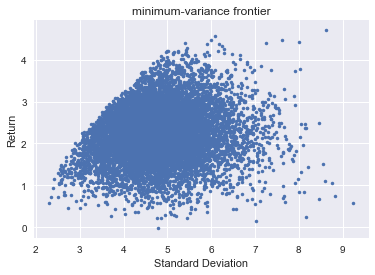

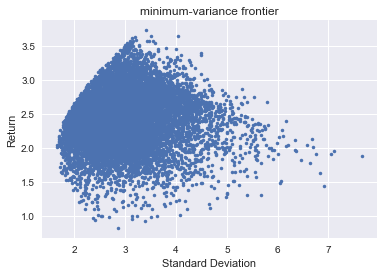

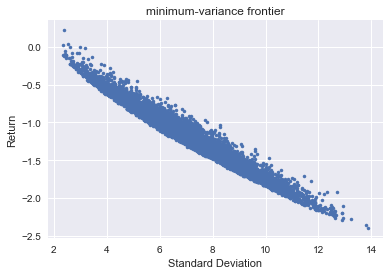

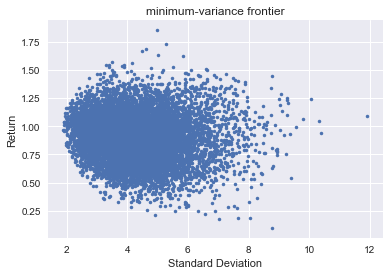

In [27]:
##### below for loop will output results in order --- results from quadrant 1 to quadrant 4


for i in range(4):
    
    
    monte_carlo_optimization(vars()['quadrant_'+ str(i+1)+'_returns'])  
    
    optimum_weights_monte_carlo[optimum_weights_monte_carlo.columns[i]] = weights_each_quadrant[i]   
    
    

In [28]:
# optimum_weights_monte_carlo

In [29]:
##### risk parity method for obtaining optimum weights

optimum_weights_rp = pd.DataFrame(index=['equity','Bonds','USD','gold','commodities'],columns= ['Quadrant1','Quadrant2', 'Quadrant3','Quadrant4'])

weights_each_quadrant_rp =[]

def risk_parity_optimization(Data):
    
    USD_return=Data['USD']
    Gold_return=Data['gold']
    Equity_return=Data['equity']
    T_return=Data['bond']
    commodities_return=Data['commodities'] 

   

   #create the dataframe of the return of the asset classes
    AssetClass=pd.DataFrame()
    AssetClass['equity']=Equity_return
    AssetClass['bond']=T_return
    AssetClass['USD']=USD_return
    AssetClass['gold']=Gold_return
    AssetClass['commodities']=commodities_return
     

    AssetClass.dropna(inplace=True)

    cov_matrix=AssetClass.cov() 
    V=np.matrix(cov_matrix)

    # risk budgeting optimization
    def calculate_portfolio_var(w,V):
        # function that calculates portfolio risk
        w = np.matrix(w)
        return (w*V*w.T)[0,0]

    def calculate_risk_contribution(w,V):
        # function that calculates asset contribution to total risk
        w = np.matrix(w)
        sigma = np.sqrt(calculate_portfolio_var(w,V))
        # Marginal Risk Contribution
        MRC = V*w.T
        # Risk Contribution
        RC = np.multiply(MRC,w.T)/sigma
        return RC

    def risk_budget_objective(x,pars):
        # calculate portfolio risk
        V = pars[0]# covariance table
        x_t = pars[1] # risk target in percent of portfolio risk
        sig_p =  np.sqrt(calculate_portfolio_var(x,V)) # portfolio sigma
        risk_target = np.asmatrix(np.multiply(sig_p,x_t))
        asset_RC = calculate_risk_contribution(x,V)
        J = sum(np.square(asset_RC-risk_target.T))[0,0]*1000 # sum of squared error
        return J

    def total_weight_constraint(x):
        return np.sum(x)-1.0

    def long_only_constraint(x):
        return x

    x_t = [0.2, 0.2, 0.2, 0.2,0.2] # your risk budget percent of total portfolio risk (equal risk)
    w0 = [0.2,0.2,0.2,0.2,0.2] 
    cons = ({'type': 'eq', 'fun': total_weight_constraint},
    {'type': 'ineq', 'fun': long_only_constraint})
    res= minimize(risk_budget_objective, w0, args=[V,x_t], method='SLSQP',constraints=cons, options={'disp': True})
    w_rb = np.asmatrix(res.x)

    #caculate the mean return of the asset classes
    USD_MeanReturn=np.mean(USD_return)
    Gold_MeanReturn=np.mean(Gold_return)
    Equity_MeanReturn=np.mean(Equity_return)
    T_MeanReturn=np.mean(T_return)
    commodities_meanreturn = np.mean(commodities_return)

    #return of the portfolio
    R=USD_MeanReturn*res.x[0]+Gold_MeanReturn*res.x[1]+Equity_MeanReturn*res.x[2]+T_MeanReturn*res.x[3]+commodities_meanreturn*res.x[4]
    print("Aunnual Return of the portfolio is",R*4)

    print(w_rb)
    
    w_rb_list = w_rb.tolist()
    weights_each_quadrant_rp.append(w_rb_list)




In [30]:
##### below for loop will output results in order --- results from quadrant 1 to quadrant 4

for i in range(4):
    
    risk_parity_optimization(vars()['quadrant_'+ str(i+1)+'_returns'])
    
    optimum_weights_rp[optimum_weights_rp.columns[i]] = weights_each_quadrant_rp[0][0][i] 
    
    

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.006343926441867e-09
            Iterations: 14
            Function evaluations: 109
            Gradient evaluations: 14
Aunnual Return of the portfolio is 9.486301437605759
[[0.1333117  0.07609738 0.4041534  0.27555153 0.11088599]]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5.1533154951655815e-08
            Iterations: 18
            Function evaluations: 137
            Gradient evaluations: 17
Aunnual Return of the portfolio is 10.08019767742356
[[0.20040401 0.09136469 0.37116591 0.19210776 0.14495762]]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.182223823287969e-08
            Iterations: 20
            Function evaluations: 155
            Gradient evaluations: 19
Aunnual Return of the portfolio is -5.802316639041776
[[0.11426596 0.04787776 0.50348526 0.27536989 0.05900114]]
Optimization term

In [31]:
# optimum_weights_rp

In [32]:
# Quarterly: Cumulative Return##### inverse vol method for obtaining optimum weights

optimum_weights_iv = pd.DataFrame(index=['equity','Bonds','USD','gold','commodities'],columns= ['Quadrant1','Quadrant2', 'Quadrant3','Quadrant4'])

weights_each_quadrant_iv =[]

def inverse_vol_optimization(Data):
    
    USD_return=Data['USD']
    Gold_return=Data['gold']
    Equity_return=Data['equity']
    T_return=Data['bond']
    commodities_return=Data['commodities'] 

    
    #volatility of each asset
    
    Equity_vol=np.std(Equity_return)
    USD_vol=np.std(USD_return)
    T_vol=np.std(T_return)
    Gold_vol=np.std(Gold_return)
    commodities_vol=np.std(commodities_return)
    
    vol=np.array([Equity_vol,USD_vol,T_vol,Gold_vol,commodities_vol])

    #inverse the vol
    inverse_vol=1/vol
    sum_vol=np.sum(inverse_vol)
    #the portfolio weight
    port_weight=inverse_vol/sum_vol

    #to test whether the sum of the weight is equal to 1
    if np.sum(port_weight)==1:
        print('True')

    #caculate the mean return of the asset classes
    USD_MeanReturn=np.mean(USD_return)
    Gold_MeanReturn=np.mean(Gold_return)
    Equity_MeanReturn=np.mean(Equity_return)
    T_MeanReturn=np.mean(T_return)
    commodities_meanreturn=np.mean(commodities_return)
    

    #return of the portfolio
    R=commodities_meanreturn*port_weight[-1]+USD_MeanReturn*port_weight[1]+Gold_MeanReturn*port_weight[3]+Equity_MeanReturn*port_weight[0]+T_MeanReturn*port_weight[2]
   
    print("Aunnual Return of the portfolio is",R*4)

    print(port_weight)
    
    weights_each_quadrant_iv.append(port_weight)
    
    



In [33]:
##### below for loop will output results in order --- results from quadrant 1 to quadrant 4

for i in range(4):
    
    inverse_vol_optimization(vars()['quadrant_'+ str(i+1)+'_returns'])
    
    optimum_weights_iv[optimum_weights_iv.columns[i]] = weights_each_quadrant_iv[i] 

True
Aunnual Return of the portfolio is 6.695522122603553
[0.14843237 0.35110041 0.12956157 0.22582684 0.1450788 ]
True
Aunnual Return of the portfolio is 8.986617919119677
[0.19356781 0.30088881 0.11925669 0.21650385 0.16978284]
True
Aunnual Return of the portfolio is -2.2383791477270414
[0.17802244 0.36495816 0.09026569 0.2701983  0.09655542]
True
Aunnual Return of the portfolio is 3.7022130572568197
[0.2589948  0.3376683  0.09519882 0.1680817  0.14005638]


In [34]:
# optimum_weights_iv

In [35]:


####Write the output to Excel   


writer = pd.ExcelWriter('return_output_'+file_name +'.xlsx') 


optimum_weights_monte_carlo.to_excel(writer,'monte carlo') 




optimum_weights_iv.to_excel(writer,'inverse vol') 

 

optimum_weights_rp.to_excel(writer,'risk parity') 

 

writer.save()  

 




In [36]:
mom = ['1_1','2_1','3_1','4_1', '1_2','2_2','3_2','4_2', '1_3','2_3','3_3','4_3', '1_4','2_4','3_4','4_4']

##### index_i_j ---- this is the list of all the index of data points in 'data_point' DataFrame ---
##### 'i' is from what quadrant you are coming from  ---- 'j' is your current quadrant

for i in mom:
    vars()['index_'+ i] = []
        
for i in index_quadrant1:
   
    if data_point['previous_quadrant'][i]== 1:
        index_1_1.append(i)
        
    elif data_point['previous_quadrant'][i]== 2:
        index_2_1.append(i)
    
    elif data_point['previous_quadrant'][i]== 3:
        index_3_1.append(i) 
        
    elif data_point['previous_quadrant'][i]== 4:
        index_4_1.append(i)
        
        
for i in index_quadrant2:
   
    if data_point['previous_quadrant'][i]== 1:
        index_1_2.append(i)
        
    elif data_point['previous_quadrant'][i]== 2:
        index_2_2.append(i)
    
    elif data_point['previous_quadrant'][i]== 3:
        index_3_2.append(i) 
        
    elif data_point['previous_quadrant'][i]== 4:
        index_4_2.append(i)    
        
for i in index_quadrant3:
   
    if data_point['previous_quadrant'][i]== 1:
        index_1_3.append(i)
        
    elif data_point['previous_quadrant'][i]== 2:
        index_2_3.append(i)
    
    elif data_point['previous_quadrant'][i]== 3:
        index_3_3.append(i) 
        
    elif data_point['previous_quadrant'][i]== 4:
        index_4_3.append(i)        
        
for i in index_quadrant4:
   
    if data_point['previous_quadrant'][i]== 1:
        index_1_4.append(i)
        
    elif data_point['previous_quadrant'][i]== 2:
        index_2_4.append(i)
    
    elif data_point['previous_quadrant'][i]== 3:
        index_3_4.append(i) 
        
    elif data_point['previous_quadrant'][i]== 4:
        index_4_4.append(i)        
            

In [37]:
#### below data frame gives average return of each asset for a particular type of regime change

momentum_df = pd.DataFrame(index = mom, columns = ['gold', 'equity', 'bonds', 'commodities','USD'])

for p in mom:
    
    L = vars()['index_'+ p]
    
    momentum_df['gold'][p] = mean(np.array([data_point['gold returns'][i] for i in L]))
    momentum_df['equity'][p] = mean(np.array([ data_point['equity returns'][i] for i in L ]))
    momentum_df['bonds'][p] = mean(np.array([ data_point['bonds returns'][i] for i in L ]))
    momentum_df['USD'][p] = mean(np.array([ data_point['USD returns'][i] for i in L ]))
    momentum_df['commodities'][p] = mean(np.array([ data_point['commodities returns'][i] for i in L]))  

In [38]:
momentum_df

,gold,equity,bonds,commodities,USD
1_1,-0.290047,5.87503,3.1126,1.91301,1.61532
2_1,6.40819,0.35904,-3.01325,5.9458,-5.48111
3_1,2.5818,2.75196,-3.22494,7.22436,-1.08964
4_1,2.12187,4.91508,1.00456,9.86406,-0.130987
1_2,2.9738,0.897286,-11.2466,2.41329,2.60351
2_2,2.28484,2.65785,5.42905,2.50322,-3.0848
3_2,3.58383,7.33416,0.758188,-0.523959,2.13919
4_2,5.88376,2.60668,5.48751,8.23948,-0.526871
1_3,0.246039,1.3767,-6.9845,-4.37018,3.27801
2_3,-2.58286,2.23577,9.06582,1.58883,0.0849888


# Data required for Validation - 2016 Q1 to 2018 Q4

In [39]:


df_USD = pd.read_excel(file_name, header = None,sheet_name = 'USD')
df_gold = pd.read_excel(file_name, header = None,sheet_name = 'gold')
df_equity = pd.read_excel(file_name, header = None,sheet_name = 'equity')
df_bonds = pd.read_excel(file_name, header = None,sheet_name = 'bonds')
df_commodities = pd.read_excel(file_name, header = None,sheet_name = 'commodities')
df_GDP = pd.read_excel(file_name, header = None,sheet_name = 'GDP')
df_CPI = pd.read_excel(file_name, header = None,sheet_name = 'CPI')

df_USD.columns = ['Date','price']
df_gold.columns = ['Date','price']
df_equity.columns = ['Date','price']
df_bonds.columns = ['Date','price']
df_commodities.columns = ['Date','price']
df_GDP.columns = ['Date','return']
df_CPI.columns = ['Date','return']


df_USD_validation = df_USD.loc[index_for_Last_date_testing+1:,:]
df_gold_validation = df_gold.loc[index_for_Last_date_testing+1:,:]
df_equity_validation = df_equity.loc[index_for_Last_date_testing+1:,:]
df_bonds_validation = df_bonds.loc[index_for_Last_date_testing+1:,:]
df_commodities_validation = df_commodities.loc[index_for_Last_date_testing+1:,:]
df_GDP_validation = df_GDP.loc[index_for_Last_date_testing+1:,:]
df_CPI_validation = df_CPI.loc[index_for_Last_date_testing+1:,:]

df_USD_validation

,Date,price
92,2016-01-01,94.586
93,2016-04-01,96.143
94,2016-07-01,95.463
95,2016-10-01,102.210
96,2017-01-01,100.350
97,2017-04-01,95.628
98,2017-07-01,93.076
99,2017-10-01,92.124
100,2018-01-01,89.974
101,2018-04-01,94.470


In [40]:

####below list contains change in GDP values quarter on quarter 
delta_change_GDP_test = [df_GDP_validation.iloc[i+1,1] - df_GDP_validation.iloc[i,1] for i in range(len(df_GDP_validation)-1)]

####below list contains change in CPI values quarter on quarter 
delta_change_CPI_test = [df_CPI_validation.iloc[i+1,1] - df_CPI_validation.iloc[i,1] for i in range(len(df_GDP_validation)-1)]

df_GDP_validation

,Date,return
92,2016-Q1,1.6
93,2016-Q2,1.3
94,2016-Q3,1.5
95,2016-Q4,1.9
96,2017-Q1,1.9
97,2017-Q2,2.1
98,2017-Q3,2.3
99,2017-Q4,2.5
100,2018-Q1,2.6
101,2018-Q2,2.9


In [41]:
data_point_val = pd.DataFrame()

data_point_val['Date'] = df_GDP_validation.loc[index_for_Last_date_testing+2:,'Date']
data_point_val['delta_change_CPI'] = delta_change_CPI_test
data_point_val['delta_change_GDP'] = delta_change_GDP_test
data_point_val['quadrant_number'] = np.zeros(len(delta_change_CPI_test))


data_point_val

,Date,delta_change_CPI,delta_change_GDP,quadrant_number
93,2016-Q2,0.10959,-0.3,0.0
94,2016-Q3,0.13746,0.2,0.0
95,2016-Q4,0.13116,0.4,0.0
96,2017-Q1,-0.20931,0.0,0.0
97,2017-Q2,-0.02280,0.2,0.0
98,2017-Q3,-0.14475,0.2,0.0
99,2017-Q4,0.16191,0.2,0.0
100,2018-Q1,0.32099,0.1,0.0
101,2018-Q2,-0.00805,0.3,0.0
102,2018-Q3,0.01084,0.1,0.0


In [42]:
#### for example: 'index_quadrant1' will give us a list of index of all the data points that fall into 1st quadrant  ( index is coming from 'data_point' DataFrame)
#### for example: 'Date_quadrant2' will give us a list of dates of all the data points that fall into 1st quadrant 

index_quadrant1_test= []

index_quadrant2_test = []

index_quadrant3_test = []

index_quadrant4_test = []


In [43]:

for i in range(len(delta_change_CPI_test)):
    
    if data_point_val.iloc[i,1]>=0 and data_point_val.iloc[i,2]>=0:    
        
        index_quadrant1_test.append(i)
        
        
    elif data_point_val.iloc[i,1]<0 and data_point_val.iloc[i,2]>=0:
           
        index_quadrant2_test.append(i)
        
        
    elif data_point_val.iloc[i,1]<0 and data_point_val.iloc[i,2]<0:
           
        index_quadrant3_test.append(i)
               
    else:
       
        index_quadrant4_test.append(i)
        
   #### note that the index you append here is 0,1,2, so on .. 0 means 1st row and 1 means 2nd row -- so use 'iloc' to call rows     
index_quadrant1_test        

[1, 2, 6, 7, 9]

In [44]:
data_point_val['quadrant_number'] = np.nan 

for i in index_quadrant1_test:
    
    data_point_val.iloc[i,3] = 1

for i in index_quadrant2_test:
    
    data_point_val.iloc[i,3] = 2
    
for i in index_quadrant3_test:
    
    data_point_val.iloc[i,3]= 3
    
for i in index_quadrant4_test:
    
    data_point_val.iloc[i,3] = 4

In [45]:
data_point_val['previous_quadrant'] = np.zeros(len(data_point_val))

data_point_val['next_quadrant'] = np.zeros(len(data_point_val))


In [46]:
warnings.filterwarnings('ignore') 
data_point_val['previous_quadrant'][index_for_Last_date_testing+2] = 'data_not_available'
data_point_val['next_quadrant'][df_CPI_validation.index[-1]] = 'data_not_available'

# data_point_val

In [47]:
warnings.filterwarnings('ignore') 

for i in data_point_val.index[1:]:
    
    data_point_val['previous_quadrant'][i] = data_point_val['quadrant_number'][i-1]

for i in data_point_val.index[:-1]:
    
    data_point_val['next_quadrant'][i] = data_point_val['quadrant_number'][i+1]  
  

In [48]:
data_point_val['USD returns'] = df_USD_validation['price'].pct_change()[1:]*100
data_point_val['gold returns'] = df_gold_validation['price'].pct_change()[1:]*100
data_point_val['equity returns'] = df_equity_validation['price'].pct_change()[1:]*100
data_point_val['bonds returns'] = df_bonds_validation['price'].pct_change()[1:]*100
data_point_val['commodities returns'] = df_commodities_validation['price'].pct_change()[1:]*100
data_point_val

,Date,delta_change_CPI,delta_change_GDP,quadrant_number,previous_quadrant,next_quadrant,USD returns,gold returns,equity returns,bonds returns,commodities returns
93,2016-Q2,0.10959,-0.3,4.0,data_not_available,1,1.646121,7.231799,1.924387,-16.892655,15.649630
94,2016-Q3,0.13746,0.2,1.0,4,1,-0.707280,-0.456162,3.258145,8.429640,-2.556250
95,2016-Q4,0.13116,0.4,1.0,1,2,7.067660,-12.795337,3.342580,53.291536,9.255274
96,2017-Q1,-0.20931,0.0,2.0,1,2,-1.819783,8.862745,5.462354,-2.331288,-2.506103
97,2017-Q2,-0.02280,0.2,2.0,2,2,-4.705531,-0.607589,2.570629,-3.475712,-4.081917
98,2017-Q3,-0.14475,0.2,2.0,2,1,-2.668674,3.071818,3.899917,1.258134,7.232096
99,2017-Q4,0.16191,0.2,1.0,2,1,-1.022820,1.801133,6.221391,3.084833,10.800555
100,2018-Q1,0.32099,0.1,1.0,1,2,-2.333811,1.740866,-1.390242,13.881962,2.373136
101,2018-Q2,-0.00805,0.3,2.0,1,1,4.996999,-5.498385,3.089493,4.416058,7.617401
102,2018-Q3,0.01084,0.1,1.0,2,2,0.700752,-4.927351,7.166028,7.025516,-0.237528


In [49]:
data_point_val['total_return_monte_carlo'] = np.nan

In [50]:
for i in index_quadrant1_test:
    
    data_point_val.iloc[i,11] = optimum_weights_monte_carlo['Quadrant1']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_monte_carlo['Quadrant1']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_monte_carlo['Quadrant1']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_monte_carlo['Quadrant1']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_monte_carlo['Quadrant1']['commodities']*data_point_val.iloc[i,10]
    
for i in index_quadrant2_test:
    
    data_point_val.iloc[i,11] = optimum_weights_monte_carlo['Quadrant2']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_monte_carlo['Quadrant2']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_monte_carlo['Quadrant2']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_monte_carlo['Quadrant2']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_monte_carlo['Quadrant2']['commodities']*data_point_val.iloc[i,10]
    
for i in index_quadrant3_test:
    
    data_point_val.iloc[i,11] = optimum_weights_monte_carlo['Quadrant3']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_monte_carlo['Quadrant3']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_monte_carlo['Quadrant3']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_monte_carlo['Quadrant3']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_monte_carlo['Quadrant3']['commodities']*data_point_val.iloc[i,10]
    
for i in index_quadrant4_test:
    
    data_point_val.iloc[i,11] = optimum_weights_monte_carlo['Quadrant4']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_monte_carlo['Quadrant4']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_monte_carlo['Quadrant4']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_monte_carlo['Quadrant4']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_monte_carlo['Quadrant4']['commodities']*data_point_val.iloc[i,10]
    
    
    

In [51]:
data_point_val['total_return_rp'] = np.nan

In [52]:
for i in index_quadrant1_test:
    
    data_point_val.iloc[i,12] = optimum_weights_rp['Quadrant1']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_rp['Quadrant1']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_rp['Quadrant1']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_rp['Quadrant1']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_rp['Quadrant1']['commodities']*data_point_val.iloc[i,10]
    
    

for i in index_quadrant2_test:
    
    data_point_val.iloc[i,12] = optimum_weights_rp['Quadrant2']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_rp['Quadrant2']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_rp['Quadrant2']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_rp['Quadrant2']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_rp['Quadrant2']['commodities']*data_point_val.iloc[i,10]
    
for i in index_quadrant3_test:
    
    data_point_val.iloc[i,12] = optimum_weights_rp['Quadrant3']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_rp['Quadrant3']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_rp['Quadrant3']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_rp['Quadrant3']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_rp['Quadrant3']['commodities']*data_point_val.iloc[i,10]
    
for i in index_quadrant4_test:
    
    data_point_val.iloc[i,12] = optimum_weights_rp['Quadrant4']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_rp['Quadrant4']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_rp['Quadrant4']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_rp['Quadrant4']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_rp['Quadrant4']['commodities']*data_point_val.iloc[i,10]
    
    
    

In [53]:

# data_point_val

In [54]:
data_point_val['total_return_iv'] = np.nan

In [55]:
for i in index_quadrant1_test:
    
    data_point_val.iloc[i,13] = optimum_weights_iv['Quadrant1']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_iv['Quadrant1']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_iv['Quadrant1']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_iv['Quadrant1']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_iv['Quadrant1']['commodities']*data_point_val.iloc[i,10]
    
    

for i in index_quadrant2_test:
    
    data_point_val.iloc[i,13] = optimum_weights_iv['Quadrant2']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_iv['Quadrant2']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_iv['Quadrant2']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_iv['Quadrant2']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_iv['Quadrant2']['commodities']*data_point_val.iloc[i,10]
    
for i in index_quadrant3_test:
    
    data_point_val.iloc[i,13] = optimum_weights_iv['Quadrant3']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_iv['Quadrant3']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_iv['Quadrant3']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_iv['Quadrant3']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_iv['Quadrant3']['commodities']*data_point_val.iloc[i,10]
    
for i in index_quadrant4_test:
    
    data_point_val.iloc[i,13] = optimum_weights_rp['Quadrant4']['equity']*data_point_val.iloc[i,8] + \
     optimum_weights_iv['Quadrant4']['Bonds']*data_point_val.iloc[i,9] + \
     optimum_weights_iv['Quadrant4']['USD']*data_point_val.iloc[i,6] + \
     optimum_weights_iv['Quadrant4']['gold']*data_point_val.iloc[i,7] + \
     optimum_weights_iv['Quadrant4']['commodities']*data_point_val.iloc[i,10]
    
    
    

In [56]:
# data_point_val


In [57]:
data_point_val['total_return_benchmark'] = np.nan
equal_weight = 0.2

In [58]:
for i in index_quadrant1_test:
    
    data_point_val.iloc[i,14] = equal_weight*data_point_val.iloc[i,8] + \
     equal_weight*data_point_val.iloc[i,9] + \
     equal_weight*data_point_val.iloc[i,6] + \
     equal_weight*data_point_val.iloc[i,7] + \
     equal_weight*data_point_val.iloc[i,10]
    
    

for i in index_quadrant2_test:
    
    data_point_val.iloc[i,14] = equal_weight*data_point_val.iloc[i,8] + \
     equal_weight*data_point_val.iloc[i,9] + \
     equal_weight*data_point_val.iloc[i,6] + \
     equal_weight*data_point_val.iloc[i,7] + \
     equal_weight*data_point_val.iloc[i,10]
    
for i in index_quadrant3_test:
    
    data_point_val.iloc[i,14] = equal_weight*data_point_val.iloc[i,8] + \
     equal_weight*data_point_val.iloc[i,9] + \
     equal_weight*data_point_val.iloc[i,6] + \
     equal_weight*data_point_val.iloc[i,7] + \
     equal_weight*data_point_val.iloc[i,10]
    
for i in index_quadrant4_test:
    data_point_val.iloc[i,14] = equal_weight*data_point_val.iloc[i,8] + \
     equal_weight*data_point_val.iloc[i,9] + \
     equal_weight*data_point_val.iloc[i,6] + \
     equal_weight*data_point_val.iloc[i,7] + \
     equal_weight*data_point_val.iloc[i,10]
    

In [59]:
# data_point_val

# calculating Cumulative returns of all optimisation methods

In [60]:


############### cumulative return for monte carlo ##############################

p_monte = 1

for i in range(len(data_point_val)):
   
    p_monte = p_monte*(1 + (data_point_val.iloc[i,11]/100))
    
avg_monte = (p_monte - 1)*100\

############### cumulative return for risk parity ##############################

p_riskparity = 1    

for i in range(len(data_point_val)):
   
    p_riskparity= p_riskparity*(1 + (data_point_val.iloc[i,12]/100))
    
avg_risk_parity = (p_riskparity - 1)*100



############### cumulative return for inverse vol ##############################


p_inv = 1 

for i in range(len(data_point_val)):
   
    p_inv= p_inv*(1 + (data_point_val.iloc[i,13]/100))
    
avg_inverse_vol = (p_inv - 1)*100



############### cumulative return for benchmark ##############################

p_bench = 1 

for i in range(len(data_point_val)):
   
    p_bench= p_bench*(1 + (data_point_val.iloc[i,14]/100))
    
avg_benchmark = (p_bench - 1)*100



cumulative_return = pd.DataFrame(index=['monte carlo','risk parity', 'inverse vol', 'benchmark'], columns= ['Cumulative return'])
cumulative_return.loc['monte carlo','Cumulative return'] = avg_monte
cumulative_return.loc['risk parity','Cumulative return'] = avg_risk_parity
cumulative_return.loc['inverse vol','Cumulative return'] = avg_inverse_vol
cumulative_return.loc['benchmark','Cumulative return'] = avg_benchmark


print("###############   cumulative return   ############################")

# print(cumulative_return)

###############   cumulative return   ############################


In [61]:
comparing_return = pd.DataFrame()
comparing_return['Date'] = data_point_val['Date']
comparing_return['quadrant_number'] = data_point_val['quadrant_number']

comparing_return['monte_carlo_excess_returns'] = data_point_val['total_return_monte_carlo'] - data_point_val['total_return_benchmark']
comparing_return['risk_parity__excess_returns'] = data_point_val['total_return_rp'] - data_point_val['total_return_benchmark']
comparing_return['inverse_vol__excess_returns'] = data_point_val['total_return_iv'] - data_point_val['total_return_benchmark']

# comparing_return

# Defining a Function for Regime based Model

In [62]:

def Regime_model(file_name, Last_date_input):

    
    df_USD = pd.read_excel(file_name, header = None,sheet_name = 'USD')
    df_gold = pd.read_excel(file_name, header = None,sheet_name = 'gold')
    df_equity = pd.read_excel(file_name, header = None,sheet_name = 'equity')
    df_bonds = pd.read_excel(file_name, header = None,sheet_name = 'bonds')
    df_commodities = pd.read_excel(file_name, header = None,sheet_name = 'commodities')
    df_GDP = pd.read_excel(file_name, header = None,sheet_name = 'GDP')
    df_CPI = pd.read_excel(file_name, header = None,sheet_name = 'CPI')


    df_USD.columns = ['Date','price']
    df_gold.columns = ['Date','price']
    df_equity.columns = ['Date','price']
    df_bonds.columns = ['Date','price']
    df_commodities.columns = ['Date','price']
    df_GDP.columns = ['Date','return']
    df_CPI.columns = ['Date','return']


    ####   input below --- till what date you want to trim the data?

    

    date = datetime.datetime.strptime(Last_date_input, "%d%b%Y")

    Last_date = date

    index_for_Last_date_testing =0


    for i in range(len(df_USD)):


        if df_USD['Date'][i] ==  Last_date:

            index_for_Last_date_testing  = i

            break

        else:
            continue

    ############## Below dataframes are new dateframes created from orginal dataframes which include entrire data
    ############## Dataframes are trimmed according to the 'Date' inputed above 

    df_USD = df_USD.loc[:index_for_Last_date_testing,:]
    df_gold = df_gold.loc[:index_for_Last_date_testing,:]
    df_equity = df_equity.loc[:index_for_Last_date_testing,:]
    df_bonds = df_bonds.loc[:index_for_Last_date_testing,:]
    df_commodities = df_commodities.loc[:index_for_Last_date_testing,:]
    df_GDP = df_GDP.loc[:index_for_Last_date_testing,:]
    df_CPI = df_CPI.loc[:index_for_Last_date_testing,:]
    
    
    #### below list contains change in GDP values quarter on quarter 

    delta_change_GDP = [df_GDP['return'][i+1] - df_GDP['return'][i] for i in range(len(df_GDP)-1)]


    #### below list contains change in CPI values quarter on quarter 

    delta_change_CPI = [df_CPI['return'][i+1] - df_CPI['return'][i] for i in range(len(df_GDP)-1)]
    
   


    # Selected view type of the correlation matrix:

    sns.set(rc={'figure.figsize':(11.7,8.27)})



    ###### below are the returns of all the data points that fall into a particular quadrant --- 

    ##### for example --- gold_returns_1 will give all gold returns of all the data points that fall into 1st quadrant

    gold_returns_1 = []
    bond_returns_1 =[]
    equity_returns_1 =[]
    USD_returns_1 =[]
    commodities_returns_1 =[]

    gold_returns_2 = []
    bond_returns_2 =[]
    equity_returns_2 =[]
    USD_returns_2 =[]
    commodities_returns_2 =[]

    gold_returns_3 = []
    bond_returns_3 =[]
    equity_returns_3 =[]
    USD_returns_3 =[]
    commodities_returns_3 =[]

    gold_returns_4 = []
    bond_returns_4 =[]
    equity_returns_4 =[]
    USD_returns_4 =[]
    commodities_returns_4 =[]


    for i in index_quadrant1:
        gold_returns_1.append(data_point['gold returns'][i])
        bond_returns_1.append(data_point['bonds returns'][i])
        equity_returns_1.append(data_point['equity returns'][i])
        USD_returns_1.append(data_point['USD returns'][i])
        commodities_returns_1.append(data_point['commodities returns'][i])


    for i in index_quadrant2:
        gold_returns_2.append(data_point['gold returns'][i])
        bond_returns_2.append(data_point['bonds returns'][i])
        equity_returns_2.append(data_point['equity returns'][i])
        USD_returns_2.append(data_point['USD returns'][i])
        commodities_returns_2.append(data_point['commodities returns'][i])

    for i in index_quadrant3:
        gold_returns_3.append(data_point['gold returns'][i])
        bond_returns_3.append(data_point['bonds returns'][i])
        equity_returns_3.append(data_point['equity returns'][i])
        USD_returns_3.append(data_point['USD returns'][i])
        commodities_returns_3.append(data_point['commodities returns'][i])


    for i in index_quadrant4:
        gold_returns_4.append(data_point['gold returns'][i])
        bond_returns_4.append(data_point['bonds returns'][i])
        equity_returns_4.append(data_point['equity returns'][i])
        USD_returns_4.append(data_point['USD returns'][i])
        commodities_returns_4.append(data_point['commodities returns'][i])


    ####### for example: avg_gold_1 will give us the average of all gold returns that fall into 1st quadrant   

    avg_gold_1 = mean(np.array(gold_returns_1))
    avg_bond_1 = mean(np.array(bond_returns_1))
    avg_equity_1 = mean(np.array(equity_returns_1))   
    avg_USD_1 = mean(np.array(USD_returns_1))   
    avg_commodities_1 = mean(np.array(commodities_returns_1))  

    avg_gold_2 = mean(np.array(gold_returns_2))   
    avg_bond_2 = mean(np.array(bond_returns_2))   
    avg_equity_2 = mean(np.array(equity_returns_2))   
    avg_USD_2 = mean(np.array(USD_returns_1))   
    avg_commodities_2 = mean(np.array(commodities_returns_2))

    avg_gold_3 = mean(np.array(gold_returns_3))  
    avg_bond_3 = mean(np.array(bond_returns_3))   
    avg_equity_3 = mean(np.array(equity_returns_3))   
    avg_USD_3 = mean(np.array(USD_returns_3))   
    avg_commodities_3 = mean(np.array(commodities_returns_3))  

    avg_gold_4 = mean(np.array(gold_returns_4))   
    avg_bond_4 = mean(np.array(bond_returns_4))  
    avg_equity_4 = mean(np.array(equity_returns_4))   
    avg_USD_4 = mean(np.array(USD_returns_4))
    avg_commodities_4 = mean(np.array(commodities_returns_4))


    return_data = pd.DataFrame(index=['Quadrant 1','Quadrant 2','Quadrant 3', 'Quadrant 4'])


    return_data['average_gold_retuns'] = [ avg_gold_1,avg_gold_2,avg_gold_3,avg_gold_4]
    return_data['max gold return'] = [max(gold_returns_1),max(gold_returns_2),max(gold_returns_3),max(gold_returns_4)]
    return_data['min gold return'] = [min(gold_returns_1),min(gold_returns_2),min(gold_returns_3),min(gold_returns_4)]
    return_data['average_bond_retuns'] = [ avg_bond_1,avg_bond_2,avg_bond_3,avg_bond_4]
    return_data['max bond return'] = [max(bond_returns_1),max(bond_returns_2),max(bond_returns_3),max(bond_returns_4)]
    return_data['min bond return'] = [min(bond_returns_1),min(bond_returns_2),min(bond_returns_3),min(bond_returns_4)]
    return_data['average_equity_retuns'] = [ avg_equity_1,avg_equity_2,avg_equity_3,avg_equity_4]
    return_data['max equity return'] = [max(equity_returns_1),max(equity_returns_2),max(equity_returns_3),max(equity_returns_4)]
    return_data['min equity return'] = [min(equity_returns_1),min(equity_returns_2),min(equity_returns_3),min(equity_returns_4)]
    return_data['average_USD_retuns'] = [ avg_USD_1,avg_USD_2,avg_USD_3,avg_USD_4]
    return_data['max USD return'] = [max(USD_returns_1),max(USD_returns_2),max(USD_returns_3),max(USD_returns_4)]
    return_data['min USD return'] = [min(USD_returns_1),min(USD_returns_2),min(USD_returns_3),min(USD_returns_4)]
    return_data['average_commodities_retuns'] = [ avg_commodities_1,avg_commodities_2,avg_commodities_3,avg_commodities_4]
    return_data['max commodities return'] = [max(commodities_returns_1),max(commodities_returns_2),max(commodities_returns_3),max(commodities_returns_4)]
    return_data['min commodities return'] = [min(commodities_returns_1),min(commodities_returns_2),min(commodities_returns_3),min(commodities_returns_4)]

    date_quad_1 =[]
    date_quad_2 =[]
    date_quad_3 =[]
    date_quad_4 =[]

    for i in index_quadrant1:

        date_quad_1.append(data_point['Date'][i])

    for i in index_quadrant2:

        date_quad_2.append(data_point['Date'][i])

    for i in index_quadrant3:

        date_quad_3.append(data_point['Date'][i])

    for i in index_quadrant4:

        date_quad_4.append(data_point['Date'][i])


    quadrant_1_returns = pd.DataFrame(columns=['gold','bond','equity','USD','commodities'], index = date_quad_1)

    quadrant_1_returns['gold'] = gold_returns_1
    quadrant_1_returns['bond'] = bond_returns_1
    quadrant_1_returns['equity'] = equity_returns_1
    quadrant_1_returns['USD'] = USD_returns_1
    quadrant_1_returns['commodities'] = commodities_returns_1


    quadrant_2_returns = pd.DataFrame(columns=['gold','bond','equity','USD','commodities'], index = date_quad_2)

    quadrant_2_returns['gold'] = gold_returns_2
    quadrant_2_returns['bond'] = bond_returns_2
    quadrant_2_returns['equity'] = equity_returns_2
    quadrant_2_returns['USD'] = USD_returns_2
    quadrant_2_returns['commodities'] = commodities_returns_2


    quadrant_3_returns = pd.DataFrame(columns=['gold','bond','equity','USD','commodities'], index = date_quad_3)

    quadrant_3_returns['gold'] = gold_returns_3
    quadrant_3_returns['bond'] = bond_returns_3
    quadrant_3_returns['equity'] = equity_returns_3
    quadrant_3_returns['USD'] = USD_returns_3
    quadrant_3_returns['commodities'] = commodities_returns_3


    quadrant_4_returns = pd.DataFrame(columns=['gold','bond','equity','USD','commodities'], index = date_quad_4)

    quadrant_4_returns['gold'] = gold_returns_4
    quadrant_4_returns['bond'] = bond_returns_4
    quadrant_4_returns['equity'] = equity_returns_4
    quadrant_4_returns['USD'] = USD_returns_4
    quadrant_4_returns['commodities'] = commodities_returns_4


    ##### monte_carlo method for obtaining optimum weights
#     display( '############################## Mote carlo results ###################################')
    optimum_weights_monte_carlo = pd.DataFrame(index=['equity','Bonds','USD','gold','commodities'],columns= ['Quadrant1','Quadrant2', 'Quadrant3','Quadrant4'])

    weights_each_quadrant =[]

    def monte_carlo_optimization(Data):


        #calculate the return of the asset classses


        USD_return=Data['USD']
        Gold_return=Data['gold']
        Equity_return=Data['equity']
        T_return=Data['bond']
        commodities_return=Data['commodities'] 



       #create the dataframe of the return of the asset classes
        AssetClass=pd.DataFrame()
        AssetClass['equity']=Equity_return
        AssetClass['bond']=T_return
        AssetClass['USD']=USD_return
        AssetClass['gold']=Gold_return
        AssetClass['commodities']=commodities_return
        AssetClass.dropna(inplace=True)


        mean_return=AssetClass.mean()           
       #print("Mean Return of Portfolios")
       #print(mean_return)


       #covraince matrix
       #print("----------------------------------------------------")
        cov_matrix=AssetClass.cov()                    
       #print("Covariance Matrix of the Portfolios")
       #print(cov_matrix)

        number_port=len(AssetClass.columns)
        V=np.matrix(cov_matrix)
        R=np.matrix(mean_return)
        Rf=0.0013 #Risk-free rate

        Port_Std=[]
        Port_MeanReturn=[]
        Sharpe_Ratio=[]
        weight=[]

        for i in range(100):

            w = np.random.uniform(0,1,size=number_port)
           #w=np.random.normal(size=number_port)
            w /= w.sum()
            weight.append(w) #portfolio weight
           #Portfolio Standard Deviation
            Port_Var=np.asscalar(w*np.matrix(V)*w.reshape(number_port,1))
            Port_Std.append(np.sqrt(Port_Var))
           #Portfolio Mean Return
            meanReturn=np.asscalar(np.matmul(R,np.matrix(w).transpose()))
            Port_MeanReturn.append(meanReturn)
           #Sharpe Ratio
            Sharpe_Ratio.append((meanReturn-Rf)/np.sqrt(Port_Var))

            num=Sharpe_Ratio.index(max(Sharpe_Ratio)) #the index of the lagest sharpe ratio
            w_tan=weight[num]

        weights_each_quadrant.append(w_tan)
#         display("======================================================")
#         display("The weight of the tangency portfolio is")
#         display(w_tan)

#         display("======================================================")
#         display("The return of the tangency portfolio is")
#         display(Port_MeanReturn[num]*4)

#         display("======================================================")
#         display("The Sharpe ratio of the tangency portfolio is")
#         display(max(Sharpe_Ratio))

        fig5=plt.figure()
        ax5=fig5.add_subplot(111)
        ax5.plot(Port_Std,Port_MeanReturn,'.')
        ax5.set_title("minimum-variance frontier")
        ax5.set_xlabel("Standard Deviation")
        ax5.set_ylabel("Return") 
        #ax5.set_xlim([0.018,0.1])
        #ax5.set_ylim([-0.1,0.1])


    ##### below for loop will output results in order --- results from quadrant 1 to quadrant 4


    for i in range(4):


        monte_carlo_optimization(vars()['quadrant_'+ str(i+1)+'_returns'])  

        optimum_weights_monte_carlo[optimum_weights_monte_carlo.columns[i]] = weights_each_quadrant[i]   


    ##### risk parity method for obtaining optimum weights
#     display( '############################## risk parity results ###################################')
    optimum_weights_rp = pd.DataFrame(index=['equity','Bonds','USD','gold','commodities'],columns= ['Quadrant1','Quadrant2', 'Quadrant3','Quadrant4'])

    weights_each_quadrant_rp =[]

    def risk_parity_optimization(Data):

        USD_return=Data['USD']
        Gold_return=Data['gold']
        Equity_return=Data['equity']
        T_return=Data['bond']
        commodities_return=Data['commodities'] 



       #create the dataframe of the return of the asset classes
        AssetClass=pd.DataFrame()
        AssetClass['equity']=Equity_return
        AssetClass['bond']=T_return
        AssetClass['USD']=USD_return
        AssetClass['gold']=Gold_return
        AssetClass['commodities']=commodities_return


        AssetClass.dropna(inplace=True)

        cov_matrix=AssetClass.cov() 
        V=np.matrix(cov_matrix)

        # risk budgeting optimization
        def calculate_portfolio_var(w,V):
            # function that calculates portfolio risk
            w = np.matrix(w)
            return (w*V*w.T)[0,0]

        def calculate_risk_contribution(w,V):
            # function that calculates asset contribution to total risk
            w = np.matrix(w)
            sigma = np.sqrt(calculate_portfolio_var(w,V))
            # Marginal Risk Contribution
            MRC = V*w.T
            # Risk Contribution
            RC = np.multiply(MRC,w.T)/sigma
            return RC

        def risk_budget_objective(x,pars):
            # calculate portfolio risk
            V = pars[0]# covariance table
            x_t = pars[1] # risk target in percent of portfolio risk
            sig_p =  np.sqrt(calculate_portfolio_var(x,V)) # portfolio sigma
            risk_target = np.asmatrix(np.multiply(sig_p,x_t))
            asset_RC = calculate_risk_contribution(x,V)
            J = sum(np.square(asset_RC-risk_target.T))[0,0]*1000 # sum of squared error
            return J

        def total_weight_constraint(x):
            return np.sum(x)-1.0

        def long_only_constraint(x):
            return x

        x_t = [0.2, 0.2, 0.2, 0.2,0.2] # your risk budget percent of total portfolio risk (equal risk)
        w0 = [0.2,0.2,0.2,0.2,0.2] 
        cons = ({'type': 'eq', 'fun': total_weight_constraint},
        {'type': 'ineq', 'fun': long_only_constraint})
        res= minimize(risk_budget_objective, w0, args=[V,x_t], method='SLSQP',constraints=cons, options={'disp': True})
        w_rb = np.asmatrix(res.x)

        #caculate the mean return of the asset classes
        USD_MeanReturn=np.mean(USD_return)
        Gold_MeanReturn=np.mean(Gold_return)
        Equity_MeanReturn=np.mean(Equity_return)
        T_MeanReturn=np.mean(T_return)
        commodities_meanreturn = np.mean(commodities_return)

        #return of the portfolio
        R=USD_MeanReturn*res.x[0]+Gold_MeanReturn*res.x[1]+Equity_MeanReturn*res.x[2]+T_MeanReturn*res.x[3]+commodities_meanreturn*res.x[4]
#         display("Annual Return of the portfolio is",R*4)

        display(w_rb)

        w_rb_list = w_rb.tolist()
        weights_each_quadrant_rp.append(w_rb_list)


    ##### below for loop will output results in order --- results from quadrant 1 to quadrant 4

    for i in range(4):

        risk_parity_optimization(vars()['quadrant_'+ str(i+1)+'_returns'])

        optimum_weights_rp[optimum_weights_rp.columns[i]] = weights_each_quadrant_rp[0][0][i] 


    ##### inverse vol method for obtaining optimum weights
#     display( '############################## Mote carlo results ###################################')
    optimum_weights_iv = pd.DataFrame(index=['equity','Bonds','USD','gold','commodities'],columns= ['Quadrant1','Quadrant2', 'Quadrant3','Quadrant4'])

    weights_each_quadrant_iv =[]

    def inverse_vol_optimization(Data):

        USD_return=Data['USD']
        Gold_return=Data['gold']
        Equity_return=Data['equity']
        T_return=Data['bond']
        commodities_return=Data['commodities'] 


        #volatility of each asset

        Equity_vol=np.std(Equity_return)
        USD_vol=np.std(USD_return)
        T_vol=np.std(T_return)
        Gold_vol=np.std(Gold_return)
        commodities_vol=np.std(commodities_return)

        vol=np.array([Equity_vol,USD_vol,T_vol,Gold_vol,commodities_vol])

        #inverse the vol
        inverse_vol=1/vol
        sum_vol=np.sum(inverse_vol)
        #the portfolio weight
        port_weight=inverse_vol/sum_vol

        #to test whether the sum of the weight is equal to 1
        if np.sum(port_weight)==1:
            print('True')

        #caculate the mean return of the asset classes
        USD_MeanReturn=np.mean(USD_return)
        Gold_MeanReturn=np.mean(Gold_return)
        Equity_MeanReturn=np.mean(Equity_return)
        T_MeanReturn=np.mean(T_return)
        commodities_meanreturn=np.mean(commodities_return)


        #return of the portfolio
        R=commodities_meanreturn*port_weight[-1]+USD_MeanReturn*port_weight[1]+Gold_MeanReturn*port_weight[3]+Equity_MeanReturn*port_weight[0]+T_MeanReturn*port_weight[2]

        display("Aunnual Return of the portfolio is",R*4)

        display(port_weight)

        weights_each_quadrant_iv.append(port_weight)


    ##### below for loop will output results in order --- results from quadrant 1 to quadrant 4

    for i in range(4):

        inverse_vol_optimization(vars()['quadrant_'+ str(i+1)+'_returns'])

        optimum_weights_iv[optimum_weights_iv.columns[i]] = weights_each_quadrant_iv[i] 


    ####Write the output to Excel   


    writer = pd.ExcelWriter( 'regime_based_24thApril_'+ file_name + '.xlsx') 

    optimum_weights_monte_carlo.to_excel(writer,'mon' + file_name) 


    optimum_weights_iv.to_excel(writer,'inv' + file_name) 



    optimum_weights_rp.to_excel(writer,'risk' + file_name) 



    writer.save()  


    mom = ['1_1','2_1','3_1','4_1','1_2','2_2','3_2','4_2','1_3','2_3','3_3','4_3','1_4','2_4','3_4','4_4']

    ##### index_i_j ---- this is the list of all the index of data points in 'data_point' DataFrame ---
    ##### 'i' is from what quadrant you are coming from  ---- 'j' is your current quadrant

#     for i in mom:
        
#         vars()['index_'+ i] = []
    
    index_1_1 = []
    index_1_2 = []
    index_1_3 = []
    index_1_4 = []
    index_2_1 = []
    index_2_2 = []
    index_2_3 = []
    index_2_4 = []
    index_3_1 = []
    index_3_2 = []
    index_3_3 = []
    index_3_4 = []
    index_4_1 = []
    index_4_2 = []
    index_4_3 = []
    index_4_4 = []

    for i in index_quadrant1:

        if data_point['previous_quadrant'][i]== 1:
            index_1_1.append(i)

        elif data_point['previous_quadrant'][i]== 2:
            index_2_1.append(i)

        elif data_point['previous_quadrant'][i]== 3:
            index_3_1.append(i) 

        elif data_point['previous_quadrant'][i]== 4:
            index_4_1.append(i)


    for i in index_quadrant2:

        if data_point['previous_quadrant'][i]== 1:
            index_1_2.append(i)

        elif data_point['previous_quadrant'][i]== 2:
            index_2_2.append(i)

        elif data_point['previous_quadrant'][i]== 3:
            index_3_2.append(i) 

        elif data_point['previous_quadrant'][i]== 4:
            index_4_2.append(i)    

    for i in index_quadrant3:

        if data_point['previous_quadrant'][i]== 1:
            index_1_3.append(i)

        elif data_point['previous_quadrant'][i]== 2:
            index_2_3.append(i)

        elif data_point['previous_quadrant'][i]== 3:
            index_3_3.append(i) 

        elif data_point['previous_quadrant'][i]== 4:
            index_4_3.append(i)        

    for i in index_quadrant4:

        if data_point['previous_quadrant'][i]== 1:
            index_1_4.append(i)

        elif data_point['previous_quadrant'][i]== 2:
            index_2_4.append(i)

        elif data_point['previous_quadrant'][i]== 3:
            index_3_4.append(i) 

        elif data_point['previous_quadrant'][i]== 4:
            index_4_4.append(i)        


        #### below data frame gives average return of each asset for a particular type of regime change


    
    
    momentum_df = pd.DataFrame(index = mom, columns = ['gold', 'equity', 'bonds', 'commodities','USD'])

            
    for p in mom:

        L = vars()['index_'+ p]

        momentum_df['gold'][p] = mean(np.array([data_point['gold returns'][i] for i in L]))
        momentum_df['equity'][p] = mean(np.array([ data_point['equity returns'][i] for i in L ]))
        momentum_df['bonds'][p] = mean(np.array([ data_point['bonds returns'][i] for i in L ]))
        momentum_df['USD'][p] = mean(np.array([ data_point['USD returns'][i] for i in L ]))
        momentum_df['commodities'][p] = mean(np.array([ data_point['commodities returns'][i] for i in L]))  

        

    df_USD = pd.read_excel(file_name, header = None,sheet_name = 'USD')
    df_gold = pd.read_excel(file_name, header = None,sheet_name = 'gold')
    df_equity = pd.read_excel(file_name, header = None,sheet_name = 'equity')
    df_bonds = pd.read_excel(file_name, header = None,sheet_name = 'bonds')
    df_commodities = pd.read_excel(file_name, header = None,sheet_name = 'commodities')
    df_GDP = pd.read_excel(file_name, header = None,sheet_name = 'GDP')
    df_CPI = pd.read_excel(file_name, header = None,sheet_name = 'CPI')

    df_USD.columns = ['Date','price']
    df_gold.columns = ['Date','price']
    df_equity.columns = ['Date','price']
    df_bonds.columns = ['Date','price']
    df_commodities.columns = ['Date','price']
    df_GDP.columns = ['Date','return']
    df_CPI.columns = ['Date','return']


    df_USD_validation = df_USD.loc[index_for_Last_date_testing+1:,:]
    df_gold_validation = df_gold.loc[index_for_Last_date_testing+1:,:]
    df_equity_validation = df_equity.loc[index_for_Last_date_testing+1:,:]
    df_bonds_validation = df_bonds.loc[index_for_Last_date_testing+1:,:]
    df_commodities_validation = df_commodities.loc[index_for_Last_date_testing+1:,:]
    df_GDP_validation = df_GDP.loc[index_for_Last_date_testing+1:,:]
    df_CPI_validation = df_CPI.loc[index_for_Last_date_testing+1:,:]
    
    

    ####below list contains change in GDP values quarter on quarter 
    delta_change_GDP_test = [df_GDP_validation.iloc[i+1,1] - df_GDP_validation.iloc[i,1] for i in range(len(df_GDP_validation)-1)]


    ####below list contains change in CPI values quarter on quarter 
    delta_change_CPI_test = [df_CPI_validation.iloc[i+1,1] - df_CPI_validation.iloc[i,1] for i in range(len(df_GDP_validation)-1)]

    
    
    data_point_val = pd.DataFrame()

    data_point_val['Date'] = df_GDP_validation.loc[index_for_Last_date_testing+2:,'Date']
    data_point_val['delta_change_CPI'] = delta_change_CPI_test
    data_point_val['delta_change_GDP'] = delta_change_GDP_test
    data_point_val['quadrant_number'] = np.zeros(len(delta_change_CPI_test))

    #### for example: 'index_quadrant1' will give us a list of index of all the data points that fall into 1st quadrant  ( index is coming from 'data_point' DataFrame)
    #### for example: 'Date_quadrant2' will give us a list of dates of all the data points that fall into 1st quadrant 

    index_quadrant1_test= []

    index_quadrant2_test = []

    index_quadrant3_test = []

    index_quadrant4_test = []


    for i in range(len(delta_change_CPI_test)):

        if data_point_val.iloc[i,1]>=0 and data_point_val.iloc[i,2]>=0:    

            index_quadrant1_test.append(i)


        elif data_point_val.iloc[i,1]<0 and data_point_val.iloc[i,2]>=0:

            index_quadrant2_test.append(i)


        elif data_point_val.iloc[i,1]<0 and data_point_val.iloc[i,2]<0:

            index_quadrant3_test.append(i)

        else:

            index_quadrant4_test.append(i)
            
            
            
    data_point_val['quadrant_number'] = np.nan 


    for i in index_quadrant1_test:

        data_point_val.iloc[i,3] = 1

    for i in index_quadrant2_test:

        data_point_val.iloc[i,3] = 2

    for i in index_quadrant3_test:

        data_point_val.iloc[i,3]= 3

    for i in index_quadrant4_test:

        data_point_val.iloc[i,3] = 4            

        
    data_point_val['previous_quadrant'] = np.zeros(len(data_point_val))
    data_point_val['next_quadrant'] = np.zeros(len(data_point_val))
   
    warnings.filterwarnings('ignore') 
    data_point_val['previous_quadrant'][index_for_Last_date_testing+2] = 'data_not_available'
    data_point_val['next_quadrant'][df_CPI_validation.index[-1]] = 'data_not_available'


    warnings.filterwarnings('ignore') 

    for i in data_point_val.index[1:]:

        data_point_val['previous_quadrant'][i] = data_point_val['quadrant_number'][i-1]

    for i in data_point_val.index[:-1]:

        data_point_val['next_quadrant'][i] = data_point_val['quadrant_number'][i+1]  

        
        
    data_point_val['USD returns'] = df_USD_validation['price'].pct_change()[1:]*100
    data_point_val['gold returns'] = df_gold_validation['price'].pct_change()[1:]*100
    data_point_val['equity returns'] = df_equity_validation['price'].pct_change()[1:]*100
    data_point_val['bonds returns'] = df_bonds_validation['price'].pct_change()[1:]*100
    data_point_val['commodities returns'] = df_commodities_validation['price'].pct_change()[1:]*100     
    
    
    
    data_point_val['total_return_monte_carlo'] = np.nan    
    
    for i in index_quadrant1_test:

        data_point_val.iloc[i,11] = optimum_weights_monte_carlo['Quadrant1']['equity']*data_point_val.iloc[i,8] + \
         optimum_weights_monte_carlo['Quadrant1']['Bonds']*data_point_val.iloc[i,9] + \
         optimum_weights_monte_carlo['Quadrant1']['USD']*data_point_val.iloc[i,6] + \
         optimum_weights_monte_carlo['Quadrant1']['gold']*data_point_val.iloc[i,7] + \
         optimum_weights_monte_carlo['Quadrant1']['commodities']*data_point_val.iloc[i,10]

    for i in index_quadrant2_test:

        data_point_val.iloc[i,11] = optimum_weights_monte_carlo['Quadrant2']['equity']*data_point_val.iloc[i,8] + \
         optimum_weights_monte_carlo['Quadrant2']['Bonds']*data_point_val.iloc[i,9] + \
         optimum_weights_monte_carlo['Quadrant2']['USD']*data_point_val.iloc[i,6] + \
         optimum_weights_monte_carlo['Quadrant2']['gold']*data_point_val.iloc[i,7] + \
         optimum_weights_monte_carlo['Quadrant2']['commodities']*data_point_val.iloc[i,10]

    for i in index_quadrant3_test:

        data_point_val.iloc[i,11] = optimum_weights_monte_carlo['Quadrant3']['equity']*data_point_val.iloc[i,8] + \
         optimum_weights_monte_carlo['Quadrant3']['Bonds']*data_point_val.iloc[i,9] + \
         optimum_weights_monte_carlo['Quadrant3']['USD']*data_point_val.iloc[i,6] + \
         optimum_weights_monte_carlo['Quadrant3']['gold']*data_point_val.iloc[i,7] + \
         optimum_weights_monte_carlo['Quadrant3']['commodities']*data_point_val.iloc[i,10]

    for i in index_quadrant4_test:

        data_point_val.iloc[i,11] = optimum_weights_monte_carlo['Quadrant4']['equity']*data_point_val.iloc[i,8] + \
         optimum_weights_monte_carlo['Quadrant4']['Bonds']*data_point_val.iloc[i,9] + \
         optimum_weights_monte_carlo['Quadrant4']['USD']*data_point_val.iloc[i,6] + \
         optimum_weights_monte_carlo['Quadrant4']['gold']*data_point_val.iloc[i,7] + \
         optimum_weights_monte_carlo['Quadrant4']['commodities']*data_point_val.iloc[i,10]

   
    data_point_val['total_return_rp'] = np.nan


    for i in index_quadrant1_test:

        data_point_val.iloc[i,12] = optimum_weights_rp['Quadrant1']['equity']*data_point_val.iloc[i,8] + \
         optimum_weights_rp['Quadrant1']['Bonds']*data_point_val.iloc[i,9] + \
         optimum_weights_rp['Quadrant1']['USD']*data_point_val.iloc[i,6] + \
         optimum_weights_rp['Quadrant1']['gold']*data_point_val.iloc[i,7] + \
         optimum_weights_rp['Quadrant1']['commodities']*data_point_val.iloc[i,10]



    for i in index_quadrant2_test:

        data_point_val.iloc[i,12] = optimum_weights_rp['Quadrant2']['equity']*data_point_val.iloc[i,8] + \
         optimum_weights_rp['Quadrant2']['Bonds']*data_point_val.iloc[i,9] + \
         optimum_weights_rp['Quadrant2']['USD']*data_point_val.iloc[i,6] + \
         optimum_weights_rp['Quadrant2']['gold']*data_point_val.iloc[i,7] + \
         optimum_weights_rp['Quadrant2']['commodities']*data_point_val.iloc[i,10]

    for i in index_quadrant3_test:

        data_point_val.iloc[i,12] = optimum_weights_rp['Quadrant3']['equity']*data_point_val.iloc[i,8] + \
         optimum_weights_rp['Quadrant3']['Bonds']*data_point_val.iloc[i,9] + \
         optimum_weights_rp['Quadrant3']['USD']*data_point_val.iloc[i,6] + \
         optimum_weights_rp['Quadrant3']['gold']*data_point_val.iloc[i,7] + \
         optimum_weights_rp['Quadrant3']['commodities']*data_point_val.iloc[i,10]

    for i in index_quadrant4_test:

        data_point_val.iloc[i,12] = optimum_weights_rp['Quadrant4']['equity']*data_point_val.iloc[i,8] + \
         optimum_weights_rp['Quadrant4']['Bonds']*data_point_val.iloc[i,9] + \
         optimum_weights_rp['Quadrant4']['USD']*data_point_val.iloc[i,6] + \
         optimum_weights_rp['Quadrant4']['gold']*data_point_val.iloc[i,7] + \
         optimum_weights_rp['Quadrant4']['commodities']*data_point_val.iloc[i,10]

    data_point_val['total_return_iv'] = np.nan
    
    
    for i in index_quadrant1_test:

        data_point_val.iloc[i,13] = optimum_weights_iv['Quadrant1']['equity']*data_point_val.iloc[i,8] + \
         optimum_weights_iv['Quadrant1']['Bonds']*data_point_val.iloc[i,9] + \
         optimum_weights_iv['Quadrant1']['USD']*data_point_val.iloc[i,6] + \
         optimum_weights_iv['Quadrant1']['gold']*data_point_val.iloc[i,7] + \
         optimum_weights_iv['Quadrant1']['commodities']*data_point_val.iloc[i,10]



    for i in index_quadrant2_test:

        data_point_val.iloc[i,13] = optimum_weights_iv['Quadrant2']['equity']*data_point_val.iloc[i,8] + \
         optimum_weights_iv['Quadrant2']['Bonds']*data_point_val.iloc[i,9] + \
         optimum_weights_iv['Quadrant2']['USD']*data_point_val.iloc[i,6] + \
         optimum_weights_iv['Quadrant2']['gold']*data_point_val.iloc[i,7] + \
         optimum_weights_iv['Quadrant2']['commodities']*data_point_val.iloc[i,10]

    for i in index_quadrant3_test:

        data_point_val.iloc[i,13] = optimum_weights_iv['Quadrant3']['equity']*data_point_val.iloc[i,8] + \
         optimum_weights_iv['Quadrant3']['Bonds']*data_point_val.iloc[i,9] + \
         optimum_weights_iv['Quadrant3']['USD']*data_point_val.iloc[i,6] + \
         optimum_weights_iv['Quadrant3']['gold']*data_point_val.iloc[i,7] + \
         optimum_weights_iv['Quadrant3']['commodities']*data_point_val.iloc[i,10]

    for i in index_quadrant4_test:

        data_point_val.iloc[i,13] = optimum_weights_rp['Quadrant4']['equity']*data_point_val.iloc[i,8] + \
         optimum_weights_iv['Quadrant4']['Bonds']*data_point_val.iloc[i,9] + \
         optimum_weights_iv['Quadrant4']['USD']*data_point_val.iloc[i,6] + \
         optimum_weights_iv['Quadrant4']['gold']*data_point_val.iloc[i,7] + \
         optimum_weights_iv['Quadrant4']['commodities']*data_point_val.iloc[i,10]

    data_point_val['total_return_benchmark'] = np.nan
    
    equal_weight = 0.2


    for i in index_quadrant1_test:

        data_point_val.iloc[i,14] = equal_weight*data_point_val.iloc[i,8] + \
         equal_weight*data_point_val.iloc[i,9] + \
         equal_weight*data_point_val.iloc[i,6] + \
         equal_weight*data_point_val.iloc[i,7] + \
         equal_weight*data_point_val.iloc[i,10]



    for i in index_quadrant2_test:

        data_point_val.iloc[i,14] = equal_weight*data_point_val.iloc[i,8] + \
         equal_weight*data_point_val.iloc[i,9] + \
         equal_weight*data_point_val.iloc[i,6] + \
         equal_weight*data_point_val.iloc[i,7] + \
         equal_weight*data_point_val.iloc[i,10]

    for i in index_quadrant3_test:

        data_point_val.iloc[i,14] = equal_weight*data_point_val.iloc[i,8] + \
         equal_weight*data_point_val.iloc[i,9] + \
         equal_weight*data_point_val.iloc[i,6] + \
         equal_weight*data_point_val.iloc[i,7] + \
         equal_weight*data_point_val.iloc[i,10]

    for i in index_quadrant4_test:
        data_point_val.iloc[i,14] = equal_weight*data_point_val.iloc[i,8] + \
         equal_weight*data_point_val.iloc[i,9] + \
         equal_weight*data_point_val.iloc[i,6] + \
         equal_weight*data_point_val.iloc[i,7] + \
         equal_weight*data_point_val.iloc[i,10]
    
    
#     display(data_point_val)
##### creating a big dataframe to combine all returns
   
    if file_name == file_name_list_f[0]:
        
        global r_quarter            # Access the global var
        r_quarter = data_point_val.loc[:,['Date','quadrant_number','total_return_monte_carlo','total_return_rp','total_return_iv','total_return_benchmark']]
        #return(comparing_return_quarter)
    
    
    elif file_name == file_name_list_f[1]:
        
        global r_semi
        r_semi = data_point_val.loc[:,['Date','quadrant_number','total_return_monte_carlo','total_return_rp','total_return_iv','total_return_benchmark']]
        #return(comparing_return_semi)
             
    elif file_name == file_name_list_f[2]:
        
        global r_annual
        r_annual = data_point_val.loc[:,['Date','quadrant_number','total_return_monte_carlo','total_return_rp','total_return_iv','total_return_benchmark']]
        #return(comparing_return_annual)    
    
    elif file_name == file_name_list_f[3]:
        
        global r_quarter_f            # Access the global var
        r_quarter_f = data_point_val.loc[:,['Date','quadrant_number','total_return_monte_carlo','total_return_rp','total_return_iv','total_return_benchmark']]
        #return(comparing_return_quarter)
    
    
    elif file_name == file_name_list_f[4]:
        
        global r_semi_f
        r_semi_f = data_point_val.loc[:,['Date','quadrant_number','total_return_monte_carlo','total_return_rp','total_return_iv','total_return_benchmark']]
        #return(comparing_return_semi)
             
    else:
        
        global r_annual_f
        r_annual_f = data_point_val.loc[:,['Date','quadrant_number','total_return_monte_carlo','total_return_rp','total_return_iv','total_return_benchmark']]
        #return(comparing_return_annual)    
        
    

    p_monte = 1


    for i in range(len(data_point_val)):

        p_monte = p_monte*(1 + (data_point_val.iloc[i,11]/100))

    avg_monte = (p_monte - 1)*100\


    p_riskparity = 1    

    for i in range(len(data_point_val)):

        p_riskparity= p_riskparity*(1 + (data_point_val.iloc[i,12]/100))

    avg_risk_parity = (p_riskparity - 1)*100




    p_inv = 1 

    for i in range(len(data_point_val)):

        p_inv= p_inv*(1 + (data_point_val.iloc[i,13]/100))

    avg_inverse_vol = (p_inv - 1)*100

    p_bench = 1 

    for i in range(len(data_point_val)):

        p_bench= p_bench*(1 + (data_point_val.iloc[i,14]/100))

    avg_benchmark = (p_bench - 1)*100


    
    
    cumulative_return = pd.DataFrame(index=['monte carlo','risk parity', 'inverse vol', 'benchmark'], columns= ['Cumulative return'])
    cumulative_return.loc['monte carlo','Cumulative return'] = avg_monte
    cumulative_return.loc['risk parity','Cumulative return'] = avg_risk_parity
    cumulative_return.loc['inverse vol','Cumulative return'] = avg_inverse_vol
    cumulative_return.loc['benchmark','Cumulative return'] = avg_benchmark


#     display("###############   cumulative return   ############################")

    
#     display(cumulative_return)
##### creating a  dataframe to look into cumulative return returns
   
    
    if file_name == file_name_list_f[0]:
        
        global cummulative_r_quarter           # Access the global var
        cummulative_r_quarter  = cumulative_return
        #return(comparing_return_quarter)
    
    
    elif file_name == file_name_list_f[1]:
        
        global cummulative_r_semi         # Access the global var
        cummulative_r_semi  = cumulative_return
       
             
    elif file_name == file_name_list_f[2]:
        global cummulative_r_annual          # Access the global var
        cummulative_r_annual  = cumulative_return
            
  
    elif file_name == file_name_list_f[3]:
        
        global cummulative_r_quarter_f          # Access the global var
        cummulative_r_quarter_f  = cumulative_return
        #return(comparing_return_quarter)
    
    
    elif file_name == file_name_list_f[4]:
        
        global cummulative_r_semi_f        # Access the global var
        cummulative_r_semi_f  = cumulative_return
       
             
    else:
        global cummulative_r_annual_f          # Access the global var
        cummulative_r_annual_f  = cumulative_return
            
        
    
    #freq = ['quarter','semi','annual']
    
    
    
    comparing_return = pd.DataFrame()
    comparing_return['Date'] = data_point_val['Date']
    comparing_return['quadrant_number'] = data_point_val['quadrant_number']

    comparing_return['monte_carlo_excess_returns'] = data_point_val['total_return_monte_carlo'] - data_point_val['total_return_benchmark']
    comparing_return['risk_parity__excess_returns'] = data_point_val['total_return_rp'] - data_point_val['total_return_benchmark']
    comparing_return['inverse_vol__excess_returns'] = data_point_val['total_return_iv'] - data_point_val['total_return_benchmark']
    
    
#     display(comparing_return)
    
    
   
     ##### creating a big dataframe to combine all returns
   
    if file_name == file_name_list_f[0]:
        
        global comparing_return_quarter            # Access the global var
        comparing_return_quarter = comparing_return
        #return(comparing_return_quarter)
  
    
    elif file_name == file_name_list_f[1]:
        
        global comparing_return_semi
        comparing_return_semi = comparing_return
        #return(comparing_return_semi)
             
    elif file_name == file_name_list_f[2]:
        
        global comparing_return_annual
        comparing_return_annual = comparing_return
        #return(comparing_return_annual)
    
    elif file_name == file_name_list_f[3]:
        
        global comparing_return_quarter_f            # Access the global var
        comparing_return_quarter_f = comparing_return
        #return(comparing_return_quarter)
  
    
    elif file_name == file_name_list_f[4]:
        
        global comparing_return_semi_f
        comparing_return_semi = comparing_return
        #return(comparing_return_semi)
             
    else:
        
        global comparing_return_annual_f
        comparing_return_annual_f = comparing_return
        #return(comparing_return_annual)    
    ##### calculating sharpe-ratios

    

    if file_name == file_name_list_f[0]:
       
        
        z1 = comparing_return['monte_carlo_excess_returns'].mean()/comparing_return['monte_carlo_excess_returns'].std()
        z2 = comparing_return['risk_parity__excess_returns'].mean()/comparing_return['risk_parity__excess_returns'].std()
        z3 = comparing_return['inverse_vol__excess_returns'].mean()/comparing_return['inverse_vol__excess_returns'].std()
        
        sharpe_quarter.append(z1)
        sharpe_quarter.append(z2)
        sharpe_quarter.append(z3)
        
    

    elif file_name == file_name_list_f[1]:
       
        
        x1 = comparing_return['monte_carlo_excess_returns'].mean()/comparing_return['monte_carlo_excess_returns'].std()
        x2 = comparing_return['risk_parity__excess_returns'].mean()/comparing_return['risk_parity__excess_returns'].std()
        x3 = comparing_return['inverse_vol__excess_returns'].mean()/comparing_return['inverse_vol__excess_returns'].std()
        
        sharpe_semi.append(x1)
        sharpe_semi.append(x2)
        sharpe_semi.append(x3)
        
      
    elif file_name == file_name_list_f[2]:
       
        y1 = comparing_return['monte_carlo_excess_returns'].mean()/comparing_return['monte_carlo_excess_returns'].std()
        y2 = np.nan
        y3 = comparing_return['inverse_vol__excess_returns'].mean()/comparing_return['inverse_vol__excess_returns'].std()
        
        sharpe_annual.append(y1)
        sharpe_annual.append(y2)
        sharpe_annual.append(y3)
     
    elif file_name == file_name_list_f[3]:
       
        
        z1 = comparing_return['monte_carlo_excess_returns'].mean()/comparing_return['monte_carlo_excess_returns'].std()
        z2 = comparing_return['risk_parity__excess_returns'].mean()/comparing_return['risk_parity__excess_returns'].std()
        z3 = comparing_return['inverse_vol__excess_returns'].mean()/comparing_return['inverse_vol__excess_returns'].std()
        
        sharpe_quarter_f.append(z1)
        sharpe_quarter_f.append(z2)
        sharpe_quarter_f.append(z3)
        
    

    elif file_name == file_name_list_f[4]:
       
        
        x1 = comparing_return['monte_carlo_excess_returns'].mean()/comparing_return['monte_carlo_excess_returns'].std()
        x2 = comparing_return['risk_parity__excess_returns'].mean()/comparing_return['risk_parity__excess_returns'].std()
        x3 = comparing_return['inverse_vol__excess_returns'].mean()/comparing_return['inverse_vol__excess_returns'].std()
        
        sharpe_semi_f.append(x1)
        sharpe_semi_f.append(x2)
        sharpe_semi_f.append(x3)
        
      
    else:
       
        y1 = comparing_return['monte_carlo_excess_returns'].mean()/comparing_return['monte_carlo_excess_returns'].std()
        y2 = np.nan
        y3 = comparing_return['inverse_vol__excess_returns'].mean()/comparing_return['inverse_vol__excess_returns'].std()
        
        sharpe_annual_f.append(y1)
        sharpe_annual_f.append(y2)
        sharpe_annual_f.append(y3)     

#     plt.figure(figsize=(10,10))

#     plt.subplot(2,2,1)
#     plt.plot(data_point_val.index,data_point_val['total_return_monte_carlo'])
#     plt.title('monte carlo')

#     plt.subplot(2,2,2)
#     plt.plot(data_point_val.index,data_point_val['total_return_rp'])
#     plt.title('risk parity')

#     plt.subplot(2,2,3)
#     plt.plot(data_point_val.index,data_point_val['total_return_iv'])
#     plt.title('inverse vol')

#     plt.show()
    
    
    


## Run the cells below by clicking the following button - inside nb:

In [63]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = Button(description = "Confirm - in nb")
button.on_click(run_all)
display(button)

Button(description='Confirm - in nb', style=ButtonStyle())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.006343926441867e-09
            Iterations: 14
            Function evaluations: 109
            Gradient evaluations: 14


matrix([[0.1333117 , 0.07609738, 0.4041534 , 0.27555153, 0.11088599]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5.1533154951655815e-08
            Iterations: 18
            Function evaluations: 137
            Gradient evaluations: 17


matrix([[0.20040401, 0.09136469, 0.37116591, 0.19210776, 0.14495762]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.182223823287969e-08
            Iterations: 20
            Function evaluations: 155
            Gradient evaluations: 19


matrix([[0.11426596, 0.04787776, 0.50348526, 0.27536989, 0.05900114]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.1076531473691677e-07
            Iterations: 18
            Function evaluations: 139
            Gradient evaluations: 17


matrix([[0.22247762, 0.07714669, 0.40172366, 0.21328661, 0.08536542]])

True


'Aunnual Return of the portfolio is'

6.695522122603553

array([0.14843237, 0.35110041, 0.12956157, 0.22582684, 0.1450788 ])

True


'Aunnual Return of the portfolio is'

8.986617919119677

array([0.19356781, 0.30088881, 0.11925669, 0.21650385, 0.16978284])

True


'Aunnual Return of the portfolio is'

-2.2383791477270414

array([0.17802244, 0.36495816, 0.09026569, 0.2701983 , 0.09655542])

True


'Aunnual Return of the portfolio is'

3.7022130572568197

array([0.2589948 , 0.3376683 , 0.09519882, 0.1680817 , 0.14005638])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.006343926441867e-09
            Iterations: 14
            Function evaluations: 109
            Gradient evaluations: 14


matrix([[0.1333117 , 0.07609738, 0.4041534 , 0.27555153, 0.11088599]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5.1533154951655815e-08
            Iterations: 18
            Function evaluations: 137
            Gradient evaluations: 17


matrix([[0.20040401, 0.09136469, 0.37116591, 0.19210776, 0.14495762]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.182223823287969e-08
            Iterations: 20
            Function evaluations: 155
            Gradient evaluations: 19


matrix([[0.11426596, 0.04787776, 0.50348526, 0.27536989, 0.05900114]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.1076531473691677e-07
            Iterations: 18
            Function evaluations: 139
            Gradient evaluations: 17


matrix([[0.22247762, 0.07714669, 0.40172366, 0.21328661, 0.08536542]])

True


'Aunnual Return of the portfolio is'

6.695522122603553

array([0.14843237, 0.35110041, 0.12956157, 0.22582684, 0.1450788 ])

True


'Aunnual Return of the portfolio is'

8.986617919119677

array([0.19356781, 0.30088881, 0.11925669, 0.21650385, 0.16978284])

True


'Aunnual Return of the portfolio is'

-2.2383791477270414

array([0.17802244, 0.36495816, 0.09026569, 0.2701983 , 0.09655542])

True


'Aunnual Return of the portfolio is'

3.7022130572568197

array([0.2589948 , 0.3376683 , 0.09519882, 0.1680817 , 0.14005638])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.006343926441867e-09
            Iterations: 14
            Function evaluations: 109
            Gradient evaluations: 14


matrix([[0.1333117 , 0.07609738, 0.4041534 , 0.27555153, 0.11088599]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5.1533154951655815e-08
            Iterations: 18
            Function evaluations: 137
            Gradient evaluations: 17


matrix([[0.20040401, 0.09136469, 0.37116591, 0.19210776, 0.14495762]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.182223823287969e-08
            Iterations: 20
            Function evaluations: 155
            Gradient evaluations: 19


matrix([[0.11426596, 0.04787776, 0.50348526, 0.27536989, 0.05900114]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.1076531473691677e-07
            Iterations: 18
            Function evaluations: 139
            Gradient evaluations: 17


matrix([[0.22247762, 0.07714669, 0.40172366, 0.21328661, 0.08536542]])

True


'Aunnual Return of the portfolio is'

6.695522122603553

array([0.14843237, 0.35110041, 0.12956157, 0.22582684, 0.1450788 ])

True


'Aunnual Return of the portfolio is'

8.986617919119677

array([0.19356781, 0.30088881, 0.11925669, 0.21650385, 0.16978284])

True


'Aunnual Return of the portfolio is'

-2.2383791477270414

array([0.17802244, 0.36495816, 0.09026569, 0.2701983 , 0.09655542])

True


'Aunnual Return of the portfolio is'

3.7022130572568197

array([0.2589948 , 0.3376683 , 0.09519882, 0.1680817 , 0.14005638])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.006343926441867e-09
            Iterations: 14
            Function evaluations: 109
            Gradient evaluations: 14


matrix([[0.1333117 , 0.07609738, 0.4041534 , 0.27555153, 0.11088599]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5.1533154951655815e-08
            Iterations: 18
            Function evaluations: 137
            Gradient evaluations: 17


matrix([[0.20040401, 0.09136469, 0.37116591, 0.19210776, 0.14495762]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.182223823287969e-08
            Iterations: 20
            Function evaluations: 155
            Gradient evaluations: 19


matrix([[0.11426596, 0.04787776, 0.50348526, 0.27536989, 0.05900114]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.1076531473691677e-07
            Iterations: 18
            Function evaluations: 139
            Gradient evaluations: 17


matrix([[0.22247762, 0.07714669, 0.40172366, 0.21328661, 0.08536542]])

True


'Aunnual Return of the portfolio is'

6.695522122603553

array([0.14843237, 0.35110041, 0.12956157, 0.22582684, 0.1450788 ])

True


'Aunnual Return of the portfolio is'

8.986617919119677

array([0.19356781, 0.30088881, 0.11925669, 0.21650385, 0.16978284])

True


'Aunnual Return of the portfolio is'

-2.2383791477270414

array([0.17802244, 0.36495816, 0.09026569, 0.2701983 , 0.09655542])

True


'Aunnual Return of the portfolio is'

3.7022130572568197

array([0.2589948 , 0.3376683 , 0.09519882, 0.1680817 , 0.14005638])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.006343926441867e-09
            Iterations: 14
            Function evaluations: 109
            Gradient evaluations: 14


matrix([[0.1333117 , 0.07609738, 0.4041534 , 0.27555153, 0.11088599]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5.1533154951655815e-08
            Iterations: 18
            Function evaluations: 137
            Gradient evaluations: 17


matrix([[0.20040401, 0.09136469, 0.37116591, 0.19210776, 0.14495762]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.182223823287969e-08
            Iterations: 20
            Function evaluations: 155
            Gradient evaluations: 19


matrix([[0.11426596, 0.04787776, 0.50348526, 0.27536989, 0.05900114]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.1076531473691677e-07
            Iterations: 18
            Function evaluations: 139
            Gradient evaluations: 17


matrix([[0.22247762, 0.07714669, 0.40172366, 0.21328661, 0.08536542]])

True


'Aunnual Return of the portfolio is'

6.695522122603553

array([0.14843237, 0.35110041, 0.12956157, 0.22582684, 0.1450788 ])

True


'Aunnual Return of the portfolio is'

8.986617919119677

array([0.19356781, 0.30088881, 0.11925669, 0.21650385, 0.16978284])

True


'Aunnual Return of the portfolio is'

-2.2383791477270414

array([0.17802244, 0.36495816, 0.09026569, 0.2701983 , 0.09655542])

True


'Aunnual Return of the portfolio is'

3.7022130572568197

array([0.2589948 , 0.3376683 , 0.09519882, 0.1680817 , 0.14005638])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.006343926441867e-09
            Iterations: 14
            Function evaluations: 109
            Gradient evaluations: 14


matrix([[0.1333117 , 0.07609738, 0.4041534 , 0.27555153, 0.11088599]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5.1533154951655815e-08
            Iterations: 18
            Function evaluations: 137
            Gradient evaluations: 17


matrix([[0.20040401, 0.09136469, 0.37116591, 0.19210776, 0.14495762]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.182223823287969e-08
            Iterations: 20
            Function evaluations: 155
            Gradient evaluations: 19


matrix([[0.11426596, 0.04787776, 0.50348526, 0.27536989, 0.05900114]])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.1076531473691677e-07
            Iterations: 18
            Function evaluations: 139
            Gradient evaluations: 17


matrix([[0.22247762, 0.07714669, 0.40172366, 0.21328661, 0.08536542]])

True


'Aunnual Return of the portfolio is'

6.695522122603553

array([0.14843237, 0.35110041, 0.12956157, 0.22582684, 0.1450788 ])

True


'Aunnual Return of the portfolio is'

8.986617919119677

array([0.19356781, 0.30088881, 0.11925669, 0.21650385, 0.16978284])

True


'Aunnual Return of the portfolio is'

-2.2383791477270414

array([0.17802244, 0.36495816, 0.09026569, 0.2701983 , 0.09655542])

True


'Aunnual Return of the portfolio is'

3.7022130572568197

array([0.2589948 , 0.3376683 , 0.09519882, 0.1680817 , 0.14005638])

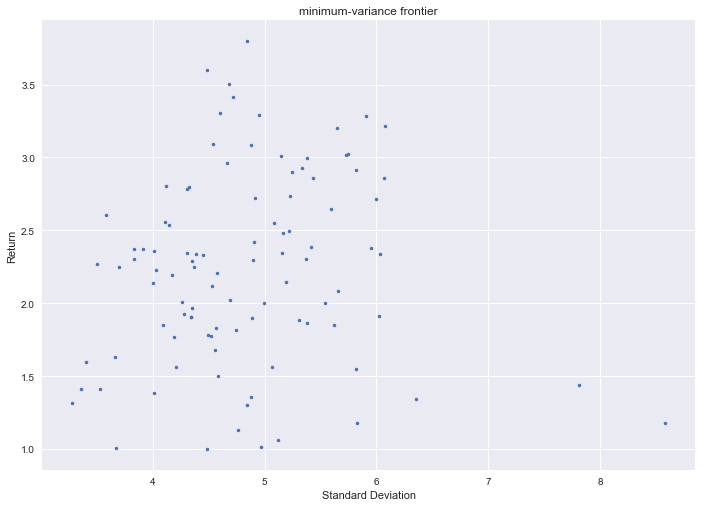

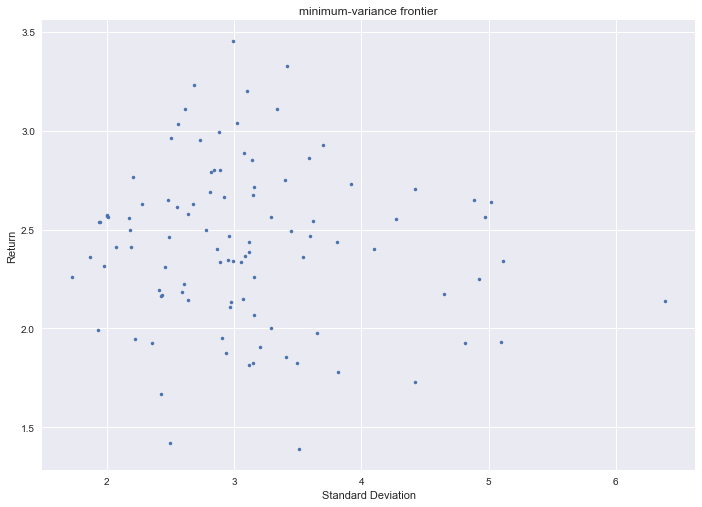

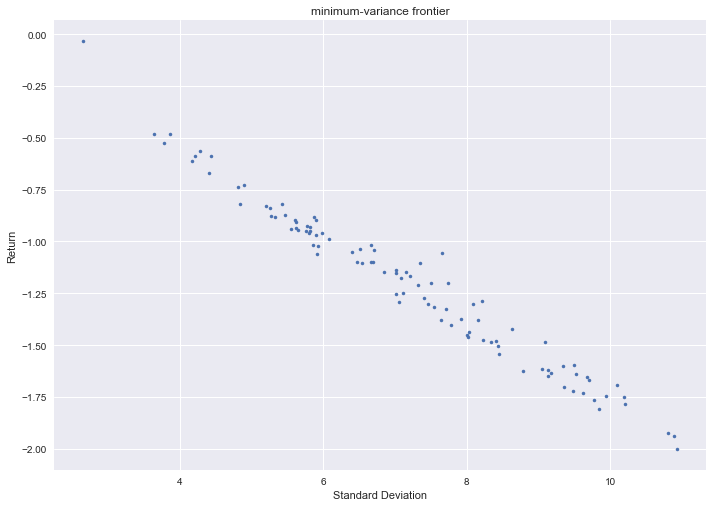

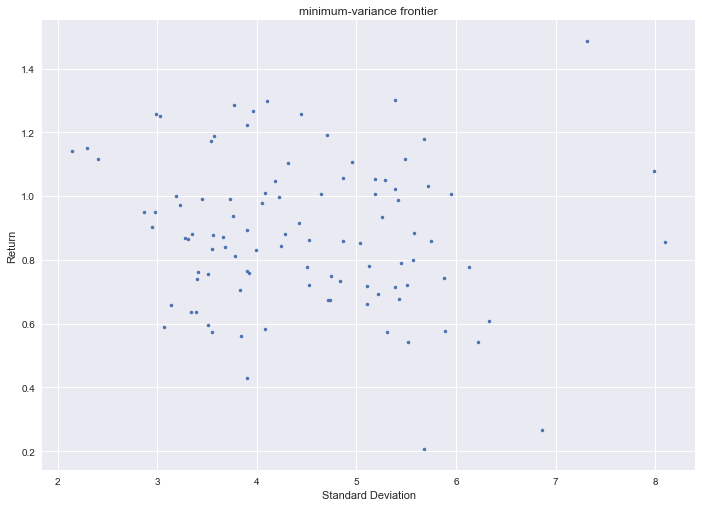

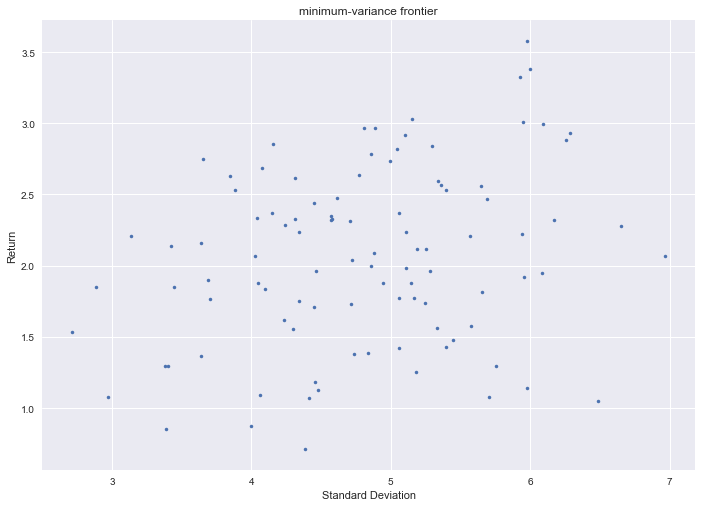

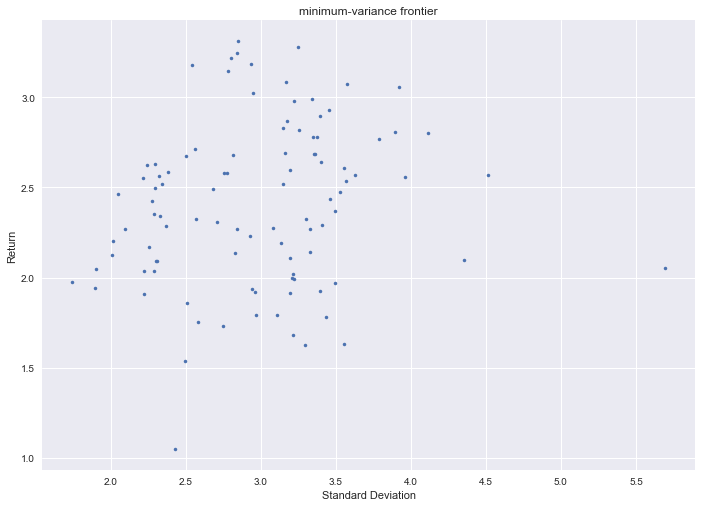

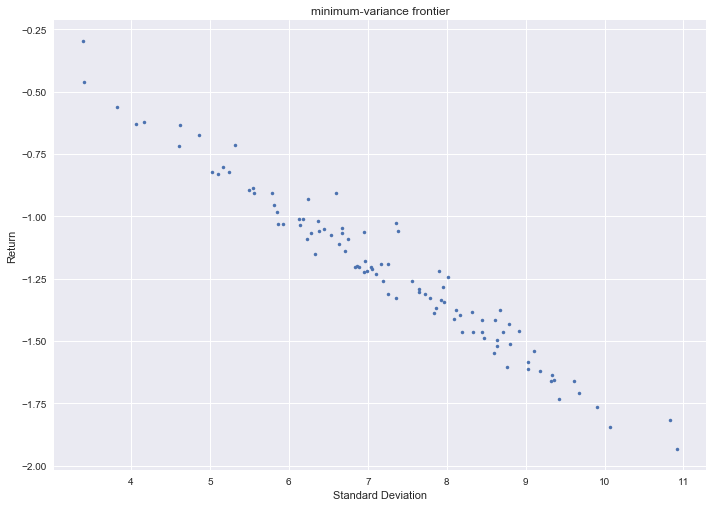

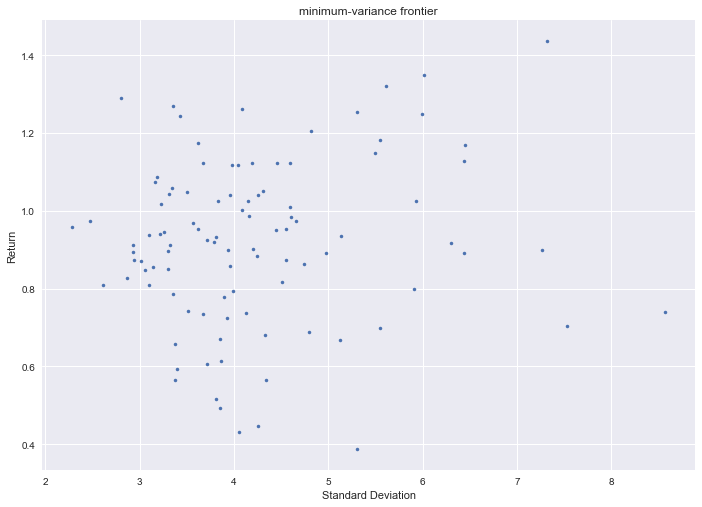

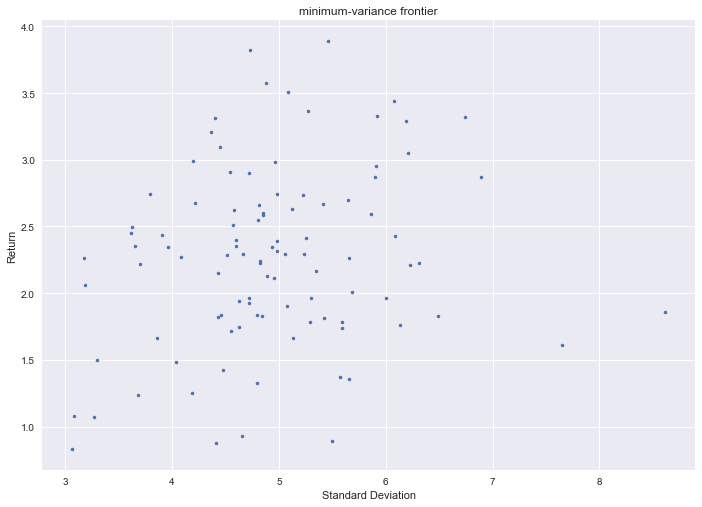

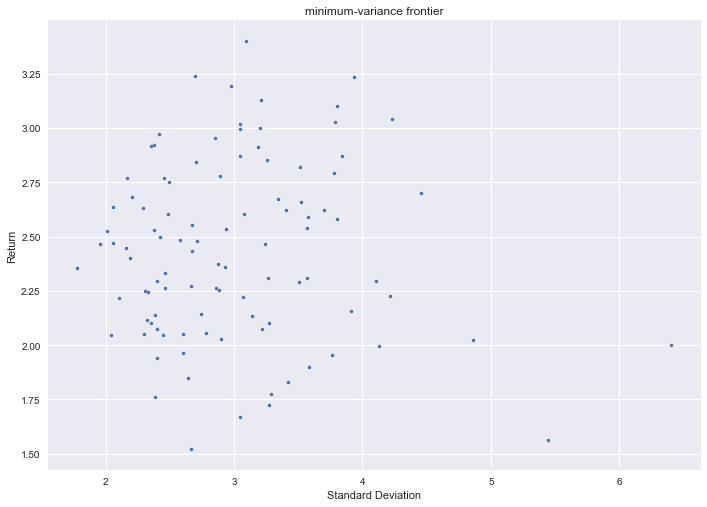

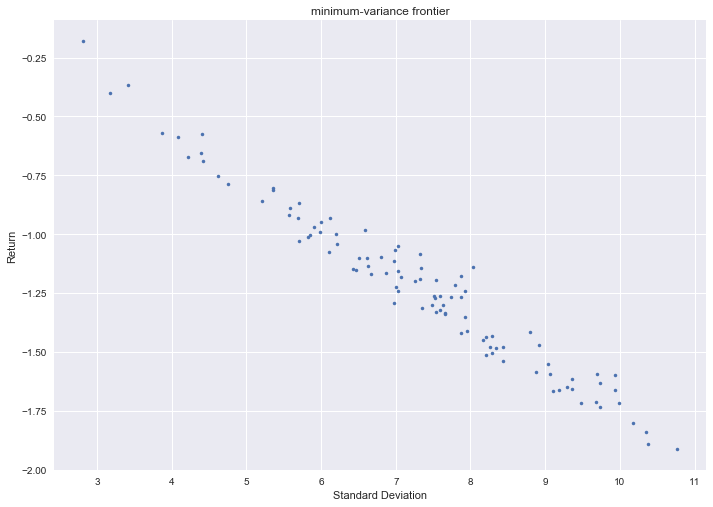

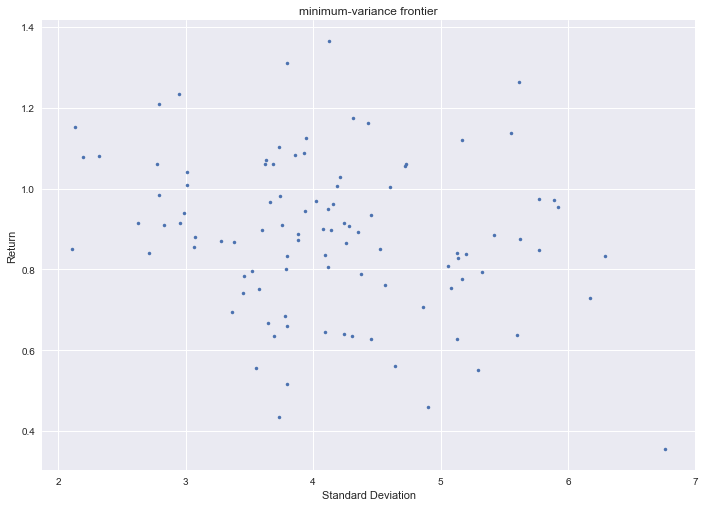

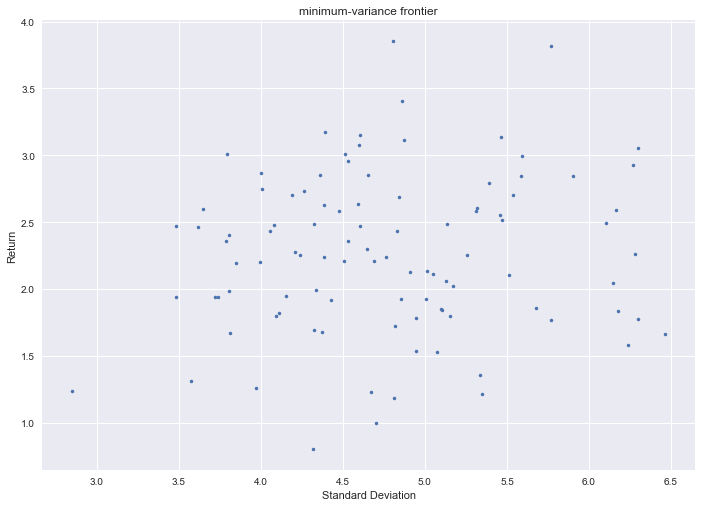

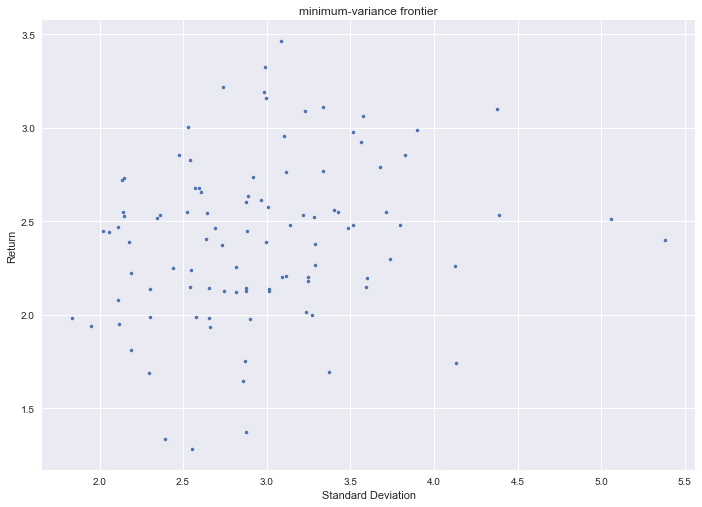

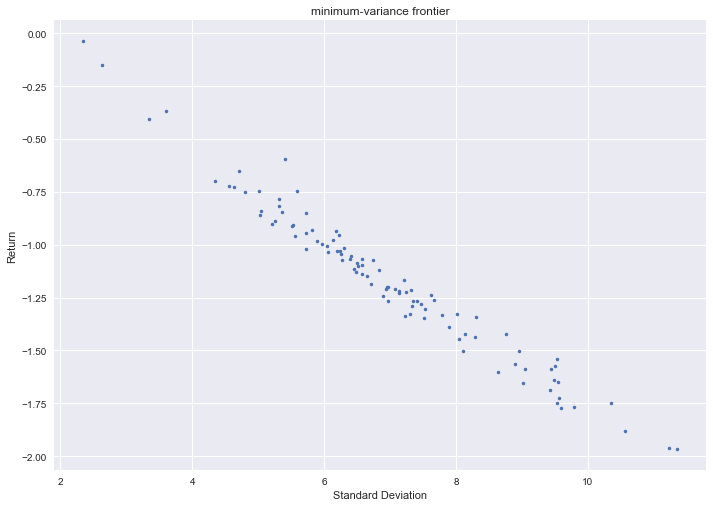

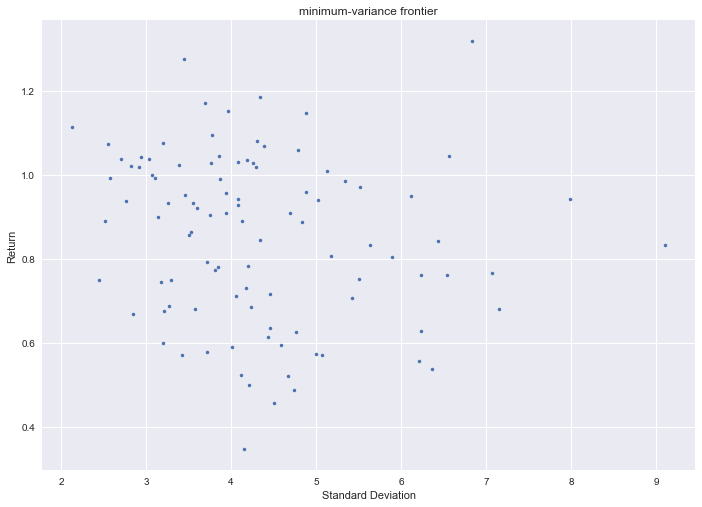

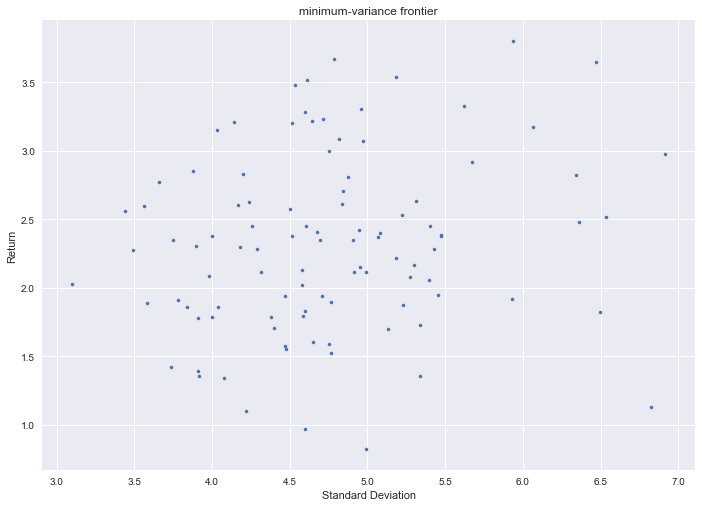

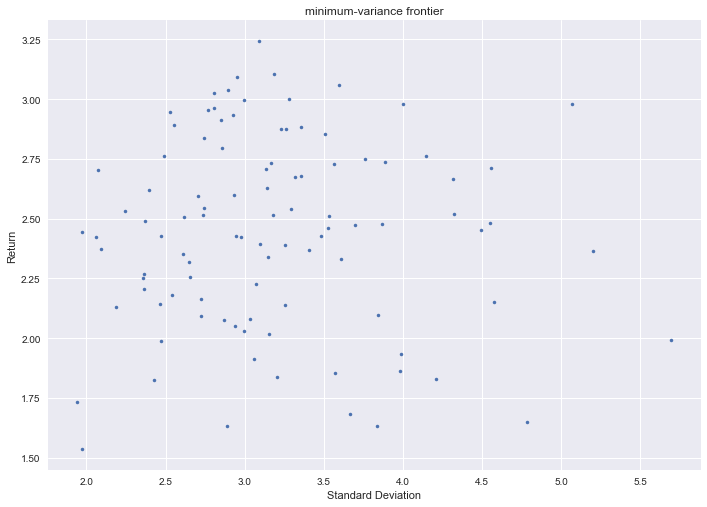

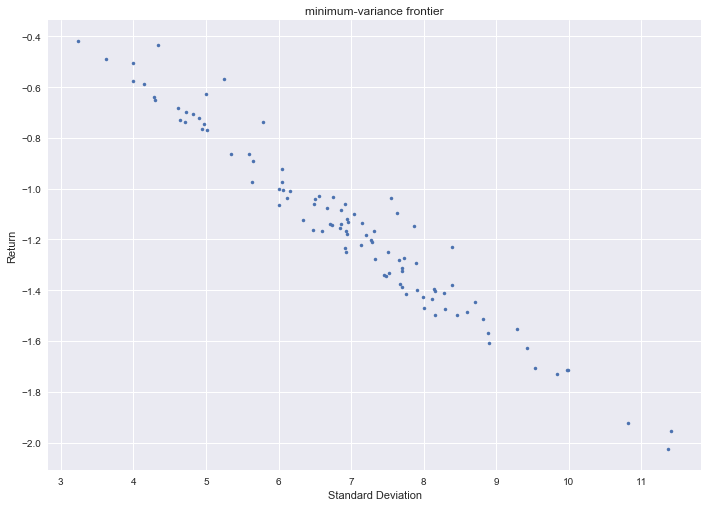

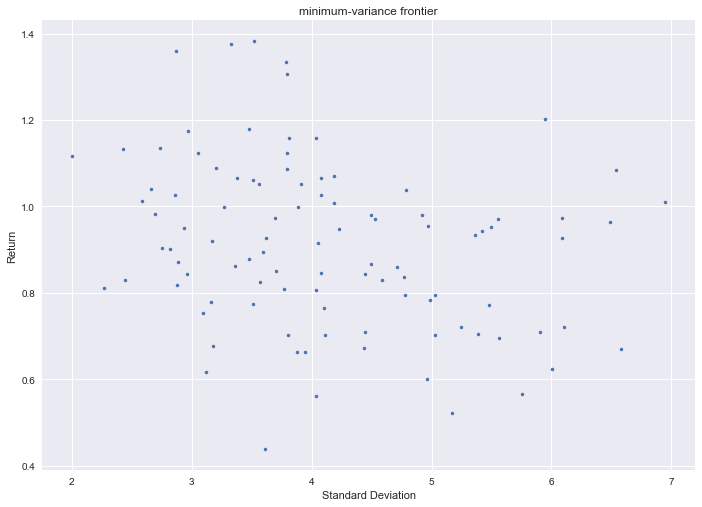

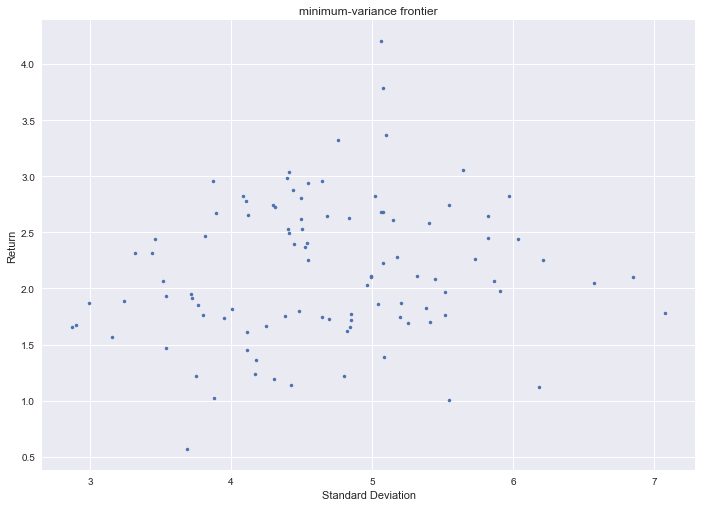

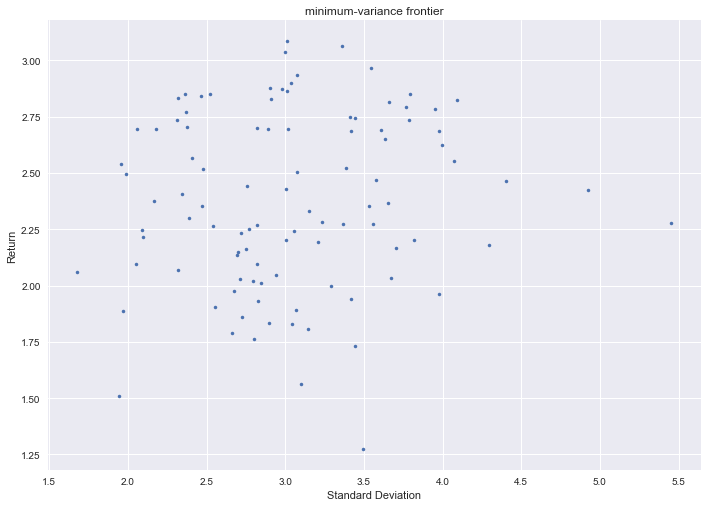

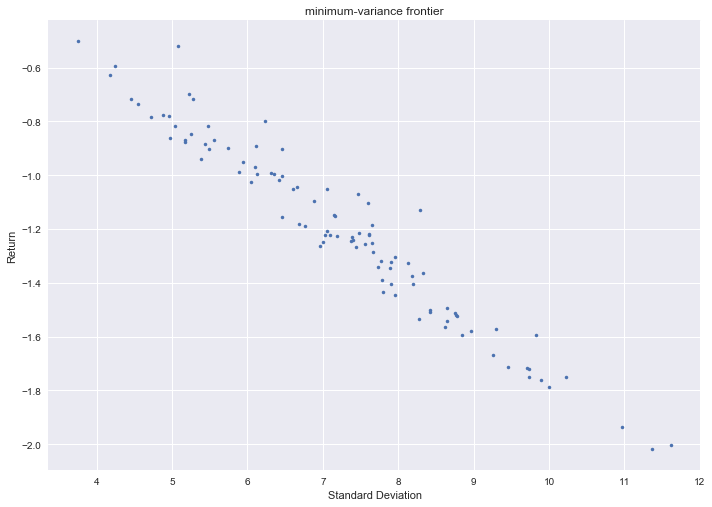

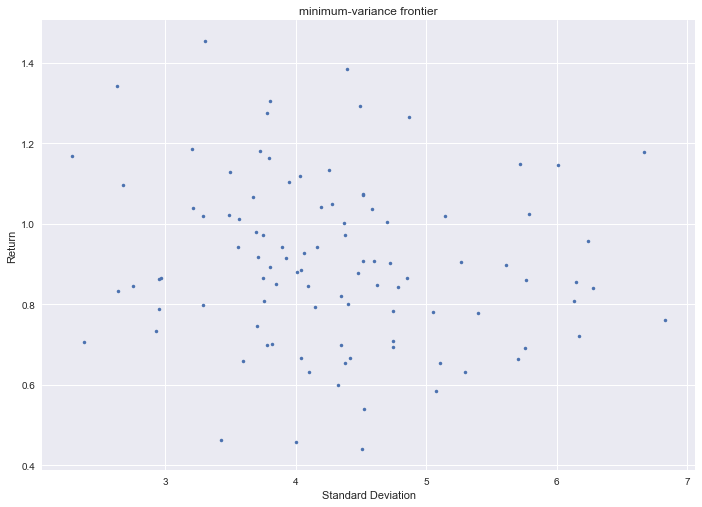

In [64]:
## Running the function:



#last_date_list = [ '01OCT2015', '01JUL2015', '01OCT2015']

df_sharpe = pd.DataFrame(index=['monte','riskparity','inverse vol'], columns = ['quarter', 'semi','annual'])


df_sharpe_f = pd.DataFrame(index=['monte','riskparity','inverse vol'], columns = ['quarter', 'semi','annual'])

##### for sharpe ration
sharpe_quarter = []
sharpe_semi = []
sharpe_annual= []

#### to create a data frame of all excess returns
comparing_return_quarter = pd.DataFrame()
comparing_return_semi = pd.DataFrame()
comparing_return_annual = pd.DataFrame()

#### to create a data frame which include all returns and benchmark
r_quarter = pd.DataFrame()
r_semi = pd.DataFrame()
r_annual = pd.DataFrame()

#### to create a data frame which include cummulative returns 
cummulative_r_quarter = pd.DataFrame()
cummulative_r_semi = pd.DataFrame()
cummulative_r_annual = pd.DataFrame()


##### for sharpe ration
sharpe_quarter_f = []
sharpe_semi_f = []
sharpe_annual_f = []

#### to create a data frame of all excess returns
comparing_return_quarter_f = pd.DataFrame()
comparing_return_semi_f = pd.DataFrame()
comparing_return_annual_f = pd.DataFrame()

#### to create a data frame which include all returns and benchmark
r_quarter_f = pd.DataFrame()
r_semi_f = pd.DataFrame()
r_annual_f = pd.DataFrame()

#### to create a data frame which include cummulative returns 
cummulative_r_quarter_f = pd.DataFrame()
cummulative_r_semi_f = pd.DataFrame()
cummulative_r_annual_f = pd.DataFrame()




for i in range(len(file_name_list_f)):
    
    Regime_model(file_name_list_f[i], last_date_list_f[i])
    
    
df_sharpe['quarter'] = sharpe_quarter
df_sharpe['semi'] = sharpe_semi 
df_sharpe['annual'] = sharpe_annual



df_sharpe_f['quarter'] = sharpe_quarter_f
df_sharpe_f['semi'] = sharpe_semi_f
df_sharpe_f['annual'] = sharpe_annual_f



In [65]:
r_semi_f

,Date,quadrant_number,total_return_monte_carlo,total_return_rp,total_return_iv,total_return_benchmark
47,2016-Q3,1.0,7.050577,2.095848,0.791565,3.144282
48,2017-Q1,1.0,5.191333,8.701956,19.254597,13.055052
49,2017-Q3,2.0,1.392833,0.179696,0.741245,0.472280
50,2018-Q1,2.0,4.359079,2.725069,8.808758,7.162056
51,2018-Q3,4.0,4.678944,6.935212,6.725127,5.033695


In [66]:
# display("Investment Horizon : Semi-Annually" , comparing_return_quarter)

In [67]:
# display("Investment Horizon : Semi-Annually" , comparing_return_semi)

In [68]:
# display("Investment Horizon : Annually" , comparing_return_annual)

## Final Formatting for Dash display:

In [69]:
def final_formatter( df_nm , freq_nm ):  
    
    df_nm['total_return_monte_carlo'] = np.round(df_nm['total_return_monte_carlo'] , 2)
    df_nm['total_return_rp'] = np.round( df_nm['total_return_rp'] , 2)
    df_nm['total_return_iv'] = np.round( df_nm['total_return_iv'] , 2)
    df_nm['total_return_benchmark'] = np.round( df_nm['total_return_benchmark'] , 2)

    my_percent_formatter(my_df = df_nm, val = 'total_return_monte_carlo')
    my_percent_formatter(my_df = df_nm, val = 'total_return_rp')
    my_percent_formatter(my_df = df_nm, val = 'total_return_iv')
    my_percent_formatter(my_df = df_nm, val = 'total_return_benchmark')
    
    df_nm.rename(columns={'total_return_monte_carlo':'Mean-Variance Returns'} , inplace=True)
    df_nm.rename(columns={'total_return_rp':'Risk Parity Returns'} , inplace=True)
    df_nm.rename(columns={'total_return_iv':'Inverse Volatility Returns'} , inplace=True)
    df_nm.rename(columns={'total_return_benchmark':'Benchmark Returns'} , inplace=True)    
    
    display_df = df_nm.style.applymap(my_color_map , subset = pd.IndexSlice[: , ['Mean-Variance Returns'
                                                                               , 'Risk Parity Returns'
                                                                               , 'Inverse Volatility Returns'
                                                                               , 'Benchmark Returns']],).hide_index()

    display(freq_nm + " Returns:" , display_df )
    
    

## Model Output with Actual Regimes:

In [70]:
df_sharpe = round( df_sharpe , 2 )
df_sharpe.fillna( value = "-" , inplace = True )
display('Information Ratio :' , df_sharpe)

'Information Ratio :'

,quarter,semi,annual
monte,-0.19,-0.45,-0.78
riskparity,-0.19,-0.64,-
inverse vol,0.24,0.39,0.97


In [71]:
final_formatter( df_nm = r_quarter , freq_nm = "Quarterly")
final_formatter( df_nm = r_semi , freq_nm = "Semi-annual")
final_formatter( df_nm = r_annual , freq_nm = "Annual")

'Quarterly Returns:'

Date,quadrant_number,Mean-Variance Returns,Risk Parity Returns,Inverse Volatility Returns,Benchmark Returns
2016-Q2,4,1%,2%,-1%,1%
2016-Q3,1,0%,1%,2%,1%
2016-Q4,1,5%,8%,18%,12%
2017-Q1,2,2%,0%,1%,1%
2017-Q2,2,-1%,0%,-1%,-2%
2017-Q3,2,1%,0%,2%,2%
2017-Q4,1,6%,2%,3%,4%
2018-Q1,1,0%,1%,5%,2%
2018-Q2,2,2%,1%,2%,2%
2018-Q3,1,2%,1%,2%,1%


'Semi-annual Returns:'

Date,quadrant_number,Mean-Variance Returns,Risk Parity Returns,Inverse Volatility Returns,Benchmark Returns
2016-Q3,4,4%,4%,1%,3%
2017-Q1,2,3%,4%,17%,13%
2017-Q3,2,2%,0%,0%,0%
2018-Q1,1,5%,4%,9%,7%
2018-Q3,1,2%,3%,5%,5%


'Annual Returns:'

Date,quadrant_number,Mean-Variance Returns,Risk Parity Returns,Inverse Volatility Returns,Benchmark Returns
2017-Q4,2,6%,2%,6%,6%
2018-Q4,1,-7%,0%,1%,-1%


In [72]:
cummulative_r_quarter['Cumulative return'] = np.round(pd.to_numeric(cummulative_r_quarter['Cumulative return'] , downcast='float'), 2)
my_percent_formatter(my_df = cummulative_r_quarter, val = 'Cumulative return')

cummulative_r_semi['Cumulative return'] = np.round(pd.to_numeric(cummulative_r_semi['Cumulative return'] , downcast='float'), 2)
my_percent_formatter(my_df = cummulative_r_semi, val = 'Cumulative return')

cummulative_r_annual['Cumulative return'] = np.round(pd.to_numeric(cummulative_r_annual['Cumulative return'] , downcast='float'), 2)
my_percent_formatter(my_df = cummulative_r_annual, val = 'Cumulative return')


In [73]:
cummulative_r_quarter.rename(columns={'Cumulative return':'Quarterly: Cumulative Return'} , inplace=True)
cummulative_r_semi.rename(columns={'Cumulative return':'Semi-Annually: Cumulative Return'} , inplace=True)
cummulative_r_annual.rename(columns={'Cumulative return':'Annually: Cumulative Return'} , inplace=True)

display(cummulative_r_quarter)  
display(cummulative_r_semi)  
display(cummulative_r_annual)  

,Quarterly: Cumulative Return
monte carlo,16%
risk parity,17%
inverse vol,28%
benchmark,22%


,Semi-Annually: Cumulative Return
monte carlo,19%
risk parity,18%
inverse vol,37%
benchmark,31%


,Annually: Cumulative Return
monte carlo,-1%
risk parity,1%
inverse vol,8%
benchmark,4%


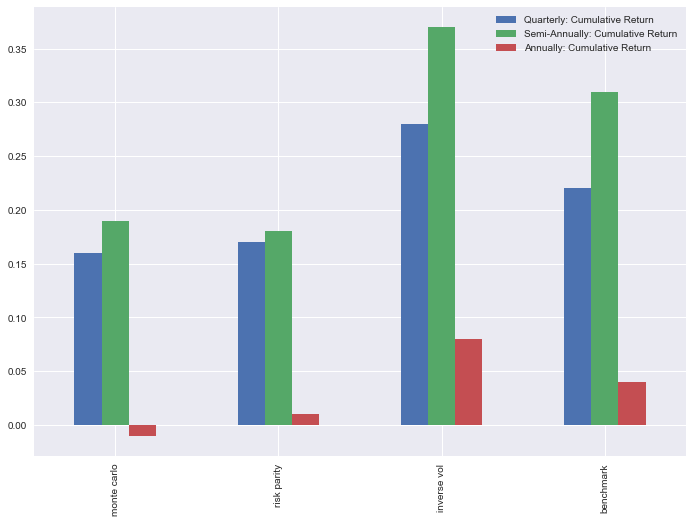

In [74]:
## Final Charts - Model Returns - Actuals:

## Bar Chart for Cumulative Returns:

df_bar_c = pd.concat([cummulative_r_quarter , cummulative_r_semi , cummulative_r_annual] , axis = 1)
# df_bar_c['Quarterly: Cumulative Return'] = re.sub(r'%', ' ', df_bar_c['Quarterly: Cumulative Return'])

df_bar_c = df_bar_c.replace(to_replace ='%', value = '', regex = True) 
df_bar_c = df_bar_c.apply(pd.to_numeric)
df_bar_c = df_bar_c / 100
# display(df_bar_c)

# fig , ax = plt.subplots()

df_bar_c.plot(kind='bar')
plt.show()


## Model Output with Forecasted Regimes:

In [75]:
df_sharpe_f = round( df_sharpe_f , 2 )
df_sharpe_f.fillna( value = "-" , inplace = True )
display('Information Ratio :' , df_sharpe_f)

'Information Ratio :'

,quarter,semi,annual
monte,-0.04,-0.28,1.61
riskparity,-0.04,-0.60,-
inverse vol,0.28,0.48,0.92


In [76]:
final_formatter( df_nm = r_quarter_f , freq_nm = "Quarterly")
final_formatter( df_nm = r_semi_f , freq_nm = "Semi-annual")
final_formatter( df_nm = r_annual_f , freq_nm = "Annual")

'Quarterly Returns:'

Date,quadrant_number,Mean-Variance Returns,Risk Parity Returns,Inverse Volatility Returns,Benchmark Returns
2016-Q2,1,7%,1%,-1%,1%
2016-Q3,4,1%,2%,3%,1%
2016-Q4,1,6%,8%,18%,12%
2017-Q1,1,1%,1%,1%,1%
2017-Q2,2,0%,0%,-1%,-2%
2017-Q3,4,1%,3%,2%,2%
2017-Q4,2,3%,1%,4%,4%
2018-Q1,1,0%,1%,5%,2%
2018-Q2,4,1%,4%,2%,2%
2018-Q3,2,1%,0%,2%,1%


'Semi-annual Returns:'

Date,quadrant_number,Mean-Variance Returns,Risk Parity Returns,Inverse Volatility Returns,Benchmark Returns
2016-Q3,1,7%,2%,0%,3%
2017-Q1,1,5%,8%,19%,13%
2017-Q3,2,1%,0%,0%,0%
2018-Q1,2,4%,2%,8%,7%
2018-Q3,4,4%,6%,6%,5%


'Annual Returns:'

Date,quadrant_number,Mean-Variance Returns,Risk Parity Returns,Inverse Volatility Returns,Benchmark Returns
2017-Q4,2,8%,2%,6%,6%
2018-Q4,3,3%,-2%,1%,-1%


In [77]:
cummulative_r_quarter_f['Cumulative return'] = np.round(pd.to_numeric(cummulative_r_quarter_f['Cumulative return'] , downcast='float'), 2)
my_percent_formatter(my_df = cummulative_r_quarter_f, val = 'Cumulative return')

cummulative_r_semi_f['Cumulative return'] = np.round(pd.to_numeric(cummulative_r_semi_f['Cumulative return'] , downcast='float'), 2)
my_percent_formatter(my_df = cummulative_r_semi_f, val = 'Cumulative return')

cummulative_r_annual_f['Cumulative return'] = np.round(pd.to_numeric(cummulative_r_annual_f['Cumulative return'] , downcast='float'), 2)
my_percent_formatter(my_df = cummulative_r_annual_f, val = 'Cumulative return')


In [78]:
cummulative_r_quarter_f.rename(columns={'Cumulative return':'Quarterly: Cumulative Return'} , inplace=True)
cummulative_r_semi_f.rename(columns={'Cumulative return':'Semi-Annually: Cumulative Return'} , inplace=True)
cummulative_r_annual_f.rename(columns={'Cumulative return':'Annually: Cumulative Return'} , inplace=True)

display(cummulative_r_quarter_f)  
display(cummulative_r_semi_f)  
display(cummulative_r_annual_f)  

,Quarterly: Cumulative Return
monte carlo,21%
risk parity,21%
inverse vol,30%
benchmark,22%


,Semi-Annually: Cumulative Return
monte carlo,24%
risk parity,22%
inverse vol,40%
benchmark,31%


,Annually: Cumulative Return
monte carlo,12%
risk parity,0%
inverse vol,8%
benchmark,4%


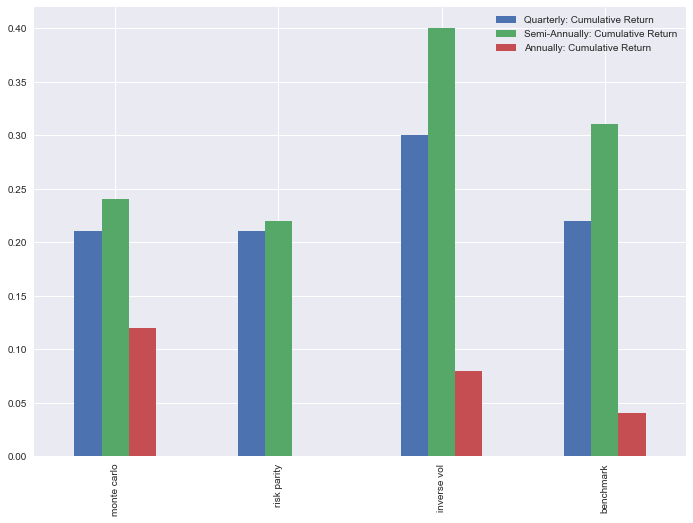

In [79]:
## Final Charts - Model Returns - Forecasts:

## Bar Chart for Cumulative Returns:

df_bar_c = pd.concat([cummulative_r_quarter_f , cummulative_r_semi_f , cummulative_r_annual_f] , axis = 1)
# df_bar_c['Quarterly: Cumulative Return'] = re.sub(r'%', ' ', df_bar_c['Quarterly: Cumulative Return'])

df_bar_c = df_bar_c.replace(to_replace ='%', value = '', regex = True) 
df_bar_c = df_bar_c.apply(pd.to_numeric)
df_bar_c = df_bar_c / 100
# display(df_bar_c)

# fig , ax = plt.subplots()

df_bar_c.plot(kind='bar')
plt.show()


# Widgets:

## Based on User Inputs, Select the Assets and Fields:

In [80]:
## Define functions for the widgets:

# Print Asset Selected:
def print_assets(Asset_Class):
    Asset_Class

# Timeframe Selection:
def print_time(Timeframe):
    Timeframe     
    
## Count of instances Selection:
# def count_selection(count):
#     count 
          
## Correlation view type selection -- Decide whether or not to display values on the correlation matrix:
def corr_selection(corr_vis):
    corr_vis 


## HPie Intslider Backward:
def hpie_slider_out_bkwd(hpiesl_bkwd):
    hpiesl_bkwd
    
## HPie Intslider Forward:
def hpie_slider_out_fwd(hpiesl_fwd):
    hpiesl_fwd    
    
## HPie Dropdown Current:
def hpie_selection_curr(Current_Regime):
    Current_Regime    
    
 
    
#### Define the widgets:

# Asset Widget
assetW = SelectMultiple( options = asset_dic , value = asset_dic )

# Timeframe Widget
timeframeW = SelectMultiple( options = timeframe_dic , value = [timeframe_dic[0]])

# Count of instances in quadrant/regime Widget
# count_w = Checkbox( value = False , description = 'Include Count of Instances')

# Selection display type from corr_toggle_button Widget
corr_toggle_button = ToggleButtons( options = ['Yes', 'No'],
                                    value = 'No',
                                    description = 'Corr. values:',
                                    disabled = False,
                                    button_style = '', # 'success', 'info', 'warning', 'danger' or ''
                                    tooltips=['Show the correlation values'],
                                    # icons=['check'] * 3 
                                  )



   
# Intslider for hierarchical pie chart_backward:
hpie_slider_bkwd = IntSlider(
                        value = 2,
                        min = 0,
                        max = 2,
                        step = 1,
                        description = 'Bkwd Regimes:',
                        disabled = False,
                        continuous_update = False,
                        orientation = 'horizontal',
                        readout = True,
                        readout_format='d'
                    )

# Intslider for hierarchical pie chart_forward:
hpie_slider_fwd = IntSlider(
                        value = 1,
                        min = 0,
                        max = 2,
                        step = 1,
                        description = 'Fwd Regimes:',
                        disabled = False,
                        continuous_update = False,
                        orientation = 'horizontal',
                        readout = True,
                        readout_format='d'
                    )

# Inflation Widget
hpie_curr_W = SelectMultiple( options = ['1' , '2' , '3', '4'] , value = ['1'] )



## Calling widget functions:

asset_w_call = interactive( print_assets , Asset_Class = assetW )

timeframe_w_call = interactive( print_time , Timeframe = timeframeW )

# count_w_call = interactive ( count_selection , count = count_w )

corr_toggle_call = interactive ( corr_selection , corr_vis = corr_toggle_button )


hpie_call_bkwd = interactive ( hpie_slider_out_bkwd , hpiesl_bkwd = hpie_slider_bkwd )

hpie_call_fwd = interactive ( hpie_slider_out_fwd , hpiesl_fwd = hpie_slider_fwd )

hpie_call_curr = interactive ( hpie_selection_curr , Current_Regime = hpie_curr_W )


## Initialize the diplayed values into lists:

asset_w_call_list = [assetW.value]
timeframe_w_call_list = [timeframeW.value]
# count_call_list = [count_w.value]
corr_toggle_call_list = [corr_toggle_button.options[1]]
hpie_call_list_bkwd = [hpie_slider_bkwd.value]
hpie_call_list_fwd = [hpie_slider_fwd.value]
hpie_call_list_curr = [hpie_curr_W.value]

## Functions to store the changes in the widget selections:
        
async def f_asset():
    for i in range(100):

        asset_w_call_val = await wait_for_change(assetW, 'value')
        asset_w_call_list.append(asset_w_call_val)
      
    
async def f_timeframe():
    for i in range(100):

        timeframe_w_call_val = await wait_for_change(timeframeW, 'value')
        timeframe_w_call_list.append(timeframe_w_call_val)
      
    
# async def f_count():
#     for i in range(100):

#         count_call_val = await wait_for_change(count_w, 'value')
#         count_call_list.append(count_call_val)
        
        
async def f_corr():
    for i in range(100):

        corr_toggle_call_val = await wait_for_change(corr_toggle_button, 'value')
        corr_toggle_call_list.append(corr_toggle_call_val)
        
        
        
async def f_hpie_bkwd():
    for i in range(100):

        hpie_call_val_bkwd = await wait_for_change(hpie_slider_bkwd, 'value')
        hpie_call_list_bkwd.append(hpie_call_val_bkwd)
        
        
async def f_hpie_fwd():
    for i in range(100):

        hpie_call_val_fwd = await wait_for_change(hpie_slider_fwd, 'value')
        hpie_call_list_fwd.append(hpie_call_val_fwd)
        
        
async def f_hpie_curr():
    for i in range(100):

        hpie_call_val_curr = await wait_for_change(hpie_curr_W, 'value')
        hpie_call_list_curr.append(hpie_call_val_curr)
        
        
## Capture the value changes in the widgets: 
asyncio.ensure_future(f_asset())
asyncio.ensure_future(f_timeframe())
# asyncio.ensure_future(f_count())
asyncio.ensure_future(f_corr())
asyncio.ensure_future(f_hpie_bkwd())
asyncio.ensure_future(f_hpie_fwd())
asyncio.ensure_future(f_hpie_curr())


<Task pending coro=<f_hpie_curr() running at <ipython-input-80-ca553f5c8c2f>:164>>

## Widget Container and Display:


In [81]:
## Place the Widgets in a container:
ui = VBox([
           
                    VBox([asset_w_call, timeframe_w_call]),
                     
                    HBox([corr_toggle_button]),
                    
                    VBox([ hpie_call_bkwd , hpie_call_fwd ]),
                        
                    HBox([ hpie_call_curr ])
          ])
         

## Display the widgets:
ui


## Run the cells below by clicking the following button - inside dash:

In [82]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = Button(description = "Confirm Selection")
button.on_click(run_all)
display(button)

<IPython.core.display.Javascript object>

Button(description='Confirm Selection', style=ButtonStyle())

Button(description='Confirm Selection', style=ButtonStyle())

Button(description='Confirm Selection', style=ButtonStyle())

## Store the user selections into variables:

In [83]:

## Store the selections made by the user:

selected_assets = asset_w_call_list[-1]
selected_timeframe = timeframe_w_call_list[-1]
# selected_count = count_call_list[-1]
selected_corr_view = corr_toggle_call_list[-1]
selected_hpie_bkwd = hpie_call_list_bkwd[-1]
selected_hpie_fwd = hpie_call_list_fwd[-1]
selected_hpie_curr = hpie_call_list_curr[-1]

#display(selected_assets, selected_timeframe, selected_count,selected_corr_view )



## Subset based on assets and timeframe:

In [84]:
selected_timeframe_list = list(selected_timeframe)
df_sub = data_point.loc[data_point['Year'].isin(selected_timeframe_list)]

selected_assets_list = list(selected_assets)
selected_assets_list = [ i + ' returns' for i in selected_assets_list]
fields = ['Date' , 'Year' , 'delta_change_CPI' , 'delta_change_GDP'] + selected_assets_list

df_sub  >>= select (fields)
# df_sub



## Create a Correlation Matrix based on the 'Returns' Columns for the selected assets:


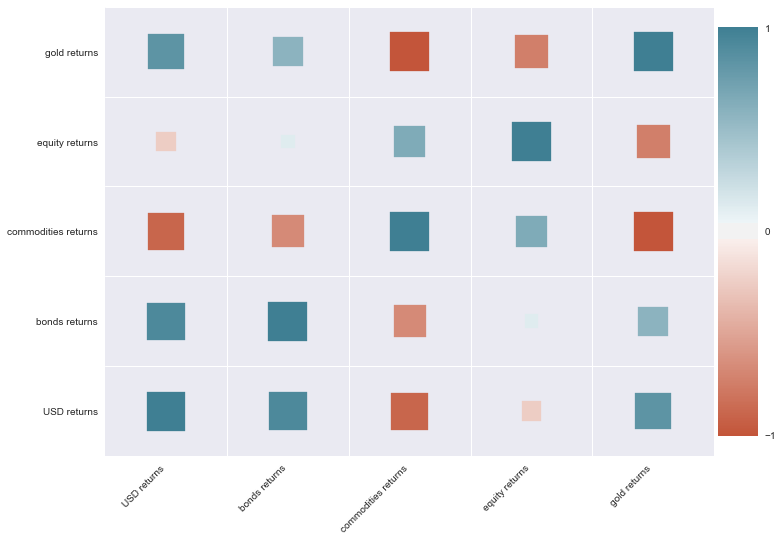

In [85]:
# Selected view type of the correlation matrix:

sns.set(rc={'figure.figsize':(11.7,8.27)})
corr_df = df_sub >> select (selected_assets_list) 
# corr_df = data_point_for_correlation_matrix >> selected_assets_list
corr_df = corr_df.dropna()
corr_in = corr_df.corr()
corr = pd.melt(corr_in.reset_index(), id_vars = 'index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']

corr_plot_store = my_heatmap(x = corr['x'],
                             y = corr['y'],
                             size = corr['value'],
                             color = corr['value'],
                             field_len = len(fields),
                             num_show = selected_corr_view )


## Chart to track Regime Change over time:

In [86]:

## Plotting the presence in regimes over time:  
plot_subset_list = ['Date' , 'quadrant_number']

df_plot = data_point.loc[data_point['Year'].isin(selected_timeframe_list)]
# df_plot = data_point
df_plot >>= select (plot_subset_list) ## Subset the dataframe

q = df_plot['Date']
q = q.tolist()
r = df_plot['quadrant_number']
r = r.tolist()

fig, ax = plt.subplots()

line = plt.plot(q , r , marker = 'o' , linestyle = ':')

plt.xticks(rotation = 60)
ax.grid()
fig.set_size_inches(14 , 3.5)

plt.xlabel('Time'  , labelpad=5, fontsize=10)
plt.ylabel('Regime', labelpad=5, fontsize=10)
plt.title('Regime Changes over Time with GDP and PCE' , fontsize = 18)
plt.yticks([1 , 2 , 3 , 4] , fontsize = 18)
n = 7  # Keeps every 7th label in the x-axis
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
plt.xticks( fontsize = .001)


#plt.show()
#plt.figure(figsize=(25,3))
mpld3.plugins.connect(fig, mpld3.plugins.PointLabelTooltip( line[0] , labels = q))
mpld3.display()



## Hierarchical Pie Chart

'USD returns'

,Backward_Looking_Regimes,Current_Regime,Forward_Looking_Regimes,Average,Maximum,Minimum,Count
0,1/3,1,1,-3%,-3%,-3%,1
1,2/1,1,1,-4%,-4%,-4%,1
2,2/2,1,1,1%,1%,1%,1
3,2/3,1,1,0%,2%,0%,2
4,2/4,1,1,-4%,-4%,-4%,1
5,3/3,1,1,-10%,-10%,-10%,1
6,3/4,1,1,-6%,-6%,-6%,1
7,4/3,1,1,-4%,-4%,-4%,1
21,3/1,1,2,1%,1%,1%,1
22,3/4,1,2,-1%,-1%,-1%,1


'gold returns'

,Backward_Looking_Regimes,Current_Regime,Forward_Looking_Regimes,Average,Maximum,Minimum,Count
0,1/3,1,1,7%,7%,7%,1
1,2/1,1,1,8%,8%,8%,1
2,2/2,1,1,8%,8%,8%,1
3,2/3,1,1,0%,3%,-3%,2
4,2/4,1,1,13%,13%,13%,1
5,3/3,1,1,3%,3%,3%,1
6,3/4,1,1,7%,7%,7%,1
7,4/3,1,1,0%,0%,0%,1
21,3/1,1,2,8%,8%,8%,1
22,3/4,1,2,-2%,-2%,-2%,1


'equity returns'

,Backward_Looking_Regimes,Current_Regime,Forward_Looking_Regimes,Average,Maximum,Minimum,Count
0,1/3,1,1,4%,4%,4%,1
1,2/1,1,1,14%,14%,14%,1
2,2/2,1,1,5%,5%,5%,1
3,2/3,1,1,7%,10%,4%,2
4,2/4,1,1,-6%,-6%,-6%,1
5,3/3,1,1,-13%,-13%,-13%,1
6,3/4,1,1,11%,11%,11%,1
7,4/3,1,1,-10%,-10%,-10%,1
21,3/1,1,2,0%,0%,0%,1
22,3/4,1,2,5%,5%,5%,1


'bonds returns'

,Backward_Looking_Regimes,Current_Regime,Forward_Looking_Regimes,Average,Maximum,Minimum,Count
0,1/3,1,1,4%,4%,4%,1
1,2/1,1,1,-6%,-6%,-6%,1
2,2/2,1,1,16%,16%,16%,1
3,2/3,1,1,-4%,-2%,-6%,2
4,2/4,1,1,1%,1%,1%,1
5,3/3,1,1,-11%,-11%,-11%,1
6,3/4,1,1,7%,7%,7%,1
7,4/3,1,1,-18%,-18%,-18%,1
21,3/1,1,2,6%,6%,6%,1
22,3/4,1,2,8%,8%,8%,1


'commodities returns'

,Backward_Looking_Regimes,Current_Regime,Forward_Looking_Regimes,Average,Maximum,Minimum,Count
0,1/3,1,1,3%,3%,3%,1
1,2/1,1,1,2%,2%,2%,1
2,2/2,1,1,13%,13%,13%,1
3,2/3,1,1,5%,9%,1%,2
4,2/4,1,1,16%,16%,16%,1
5,3/3,1,1,0%,0%,0%,1
6,3/4,1,1,12%,12%,12%,1
7,4/3,1,1,0%,0%,0%,1
21,3/1,1,2,18%,18%,18%,1
22,3/4,1,2,4%,4%,4%,1


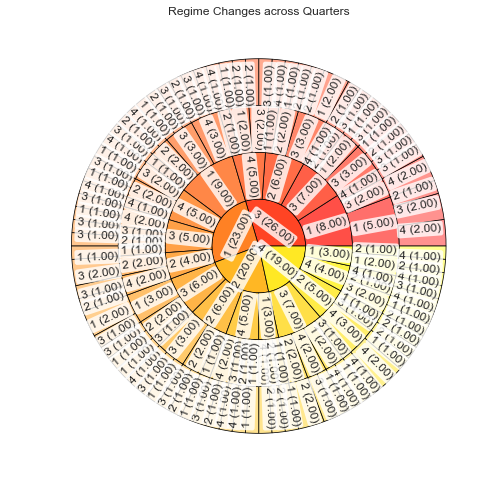

In [87]:
# ### Dataframe for quadrant after another, hpie:

## Selection of Scenarios, based on widget outputs:

## number of backward looking quarters:
bkwd_num = selected_hpie_bkwd

## number of forward looking quarters:
fwd_num = selected_hpie_fwd

## The regime(s) {1/2/3/4} we want to look at:
regime_filter_list = selected_hpie_curr

# ## Use the same plotting Dataframe created before:
#df_hpie = data_point.loc[data_point['Year'].isin(selected_timeframe_list)]
data_point['quadrant_number'] = pd.to_numeric( data_point['quadrant_number'] , downcast='integer')
df_hpie = data_point
df_hpie >>= select ( plot_subset_list + selected_assets_list ) ## Subset the dataframe

df_hpie.columns = ['Date' , 'Regime_lag_0'] + selected_assets_list
lvl_count = bkwd_num + 1 + fwd_num ## Specify the numbers of qtrs we want to go back (including current) -- change later to widget input
# lvl_count = 2


## Preparatory:
for i in range(1, lvl_count + 1):
    curr_col = "Regime_lag_" + str(i)
    prev_col = "Regime_lag_" + str(i-1)
    df_hpie[curr_col] = df_hpie[prev_col].shift(-1)

df_hpie_out = pd.DataFrame() # Initialize an empty dataframe, reqd for the hierarchical pie chart
   
    
Regime_list = ["Regime_lag_" + str(j) for j in range( 0 , lvl_count )] # List of the regimes which fall in this

df_hpie_sub = df_hpie >> select(['Date'] + Regime_list)
df_hpie_piv = pd.pivot_table(df_hpie_sub , values = 'Date', index = Regime_list , aggfunc = 'count')
df_hpie_piv = df_hpie_piv.reset_index()

df_hpie_piv = df_hpie_piv[df_hpie_piv.columns[::-1]] ## Reverse the order of columns 

df_hpie_list = list(df_hpie_piv.columns[1:]) ## Create a list of the levels

for i in df_hpie_list:
    df_hpie_piv[i] = pd.to_numeric( df_hpie_piv[i] , downcast = 'integer')
    
df_hpie_piv = df_hpie_piv.astype(str)    




df_hpie_piv['dictionary_key'] = df_hpie_piv[ df_hpie_list ].apply(lambda x: '/'.join(x), axis = 1) 
df_hpie_piv >>= select(X.dictionary_key , X.Date)
df_hpie_piv['Date'] = pd.to_numeric( df_hpie_piv['Date'] )

df_hpie_piv = df_hpie_piv.set_index('dictionary_key')

## Convert the dataframe output into a dictionary for input into the HPie Chart:
hpie_dict = df_hpie_piv.to_dict()    
hpie_dict = list(hpie_dict.values())
hpie_dict = hpie_dict[0]


# ## Create Asset wise pivots, to display the average returns in individual hpie charts:
for i in selected_assets_list:
    
    df_asset_sub = df_hpie >> select(['Date'] + Regime_list + [i])
    df_asset_sub = df_asset_sub.dropna()
    df_asset_piv = pd.pivot_table(df_asset_sub , values = i, index = Regime_list + ['Date'], aggfunc = np.sum)
    df_asset_piv = df_asset_piv.reset_index()
    df_asset_piv = df_asset_piv.drop(columns = ['Date'])
    
    df_asset_piv = df_asset_piv[df_asset_piv.columns[::-1]] ## Reverse the order of columns 

    df_lvl_list = list(df_asset_piv.columns[1:]) ## Create a list of the levels
    
    for j in df_lvl_list:
        df_asset_piv[j] = pd.to_numeric( df_asset_piv[j] , downcast = 'integer')
    
    bkwd_lvl_list = df_lvl_list[ : bkwd_num ] ## Sublist backward looking regimes
    curr_lvl_list = [ df_lvl_list[ bkwd_num ] ] ## Sublist current regime
    fwd_lvl_list = df_lvl_list[ bkwd_num + 1 : ] ## Sublist forward looking regimes
    
    df_asset_piv = df_asset_piv.astype(str)
    
#     df_asset_piv['dictionary_key'] = df_asset_piv[ df_lvl_list ].apply(lambda x: '/'.join(x), axis = 1) 

    df_asset_piv['Backward_Looking_Regimes'] = df_asset_piv[ bkwd_lvl_list ].apply(lambda x: '/'.join(x), axis = 1)
    df_asset_piv['Current_Regime'] = df_asset_piv[ curr_lvl_list ].apply(lambda x: '/'.join(x), axis = 1)
    df_asset_piv['Forward_Looking_Regimes'] = df_asset_piv[ fwd_lvl_list ].apply(lambda x: '/'.join(x), axis = 1)

    df_asset_piv['Current_Regime'] = pd.to_numeric( df_asset_piv['Current_Regime'])

    df_asset_piv[i] = pd.to_numeric( df_asset_piv[i] , downcast='float')
        
    df_asset_piv.rename(columns={i:'asset'} , inplace = True)


    df_asset_piv >>= group_by( X.Forward_Looking_Regimes
                             , X.Current_Regime
                             , X.Backward_Looking_Regimes) >> summarize(  Average = X.asset.mean()                                                                
                                                               , Maximum = X.asset.max() 
                                                               , Minimum = X.asset.min()
                                                               , Count = X.asset.count() 
                                                                      )
    
    df_asset_piv = df_asset_piv.loc[df_asset_piv['Current_Regime'].isin(regime_filter_list)]
 
    df_asset_piv['Average'] = np.round( df_asset_piv['Average'] , 2)
    df_asset_piv['Maximum'] = np.round( df_asset_piv['Maximum'] , 2)
    df_asset_piv['Minimum'] = np.round( df_asset_piv['Minimum'] , 2)
     
    my_percent_formatter(my_df = df_asset_piv, val = 'Average')
    my_percent_formatter(my_df = df_asset_piv, val = 'Maximum')
    my_percent_formatter(my_df = df_asset_piv, val = 'Minimum')
    
    
       
    display(i , df_asset_piv.style.applymap(my_color_map , subset = pd.IndexSlice[: , ['Average'
                                                                                   , 'Maximum'
                                                                                   , 'Minimum']]) )


## Overall:  
   
fig, ax = plt.subplots()

data = stringvalues_to_pv(hpie_dict)

hp = HPie( data , ax )

# set plot attributes

hp.plot(setup_axes = True)
ax.set_title('Regime Changes across Quarters')

# save/show plot

plt.show()

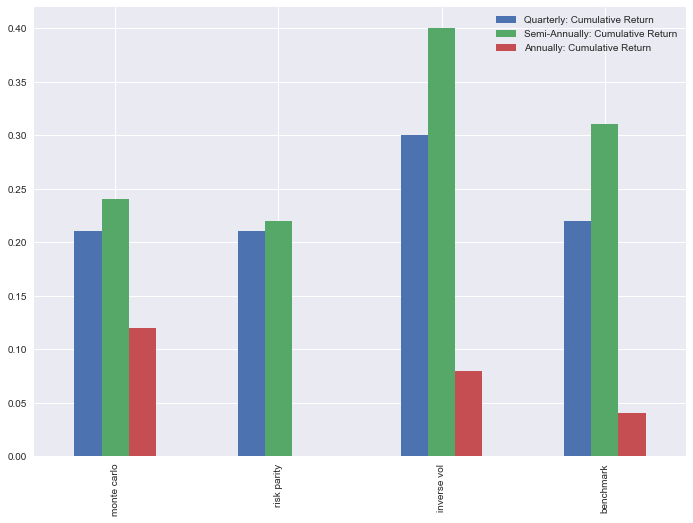

In [88]:
## Final Charts - Model Returns - Forecasts:

## Bar Chart for Cumulative Returns:

df_bar_c = pd.concat([cummulative_r_quarter_f , cummulative_r_semi_f , cummulative_r_annual_f] , axis = 1)
# df_bar_c['Quarterly: Cumulative Return'] = re.sub(r'%', ' ', df_bar_c['Quarterly: Cumulative Return'])

df_bar_c = df_bar_c.replace(to_replace ='%', value = '', regex = True) 
df_bar_c = df_bar_c.apply(pd.to_numeric)
df_bar_c = df_bar_c / 100
# display(df_bar_c)

# fig , ax = plt.subplots()

df_bar_c.plot(kind='bar')
plt.show()